In [1]:
#import all packages
%matplotlib inline
import os
import re
import math
import numpy as np
import pandas as pd
from datetime import timedelta
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
# Importing Classifier Modules
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import r2_score
import sklearn.model_selection as cv
#import pandas_profiling #.profile_report()
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

ModuleNotFoundError: No module named 'xgboost'

In [367]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [368]:
import warnings
warnings.filterwarnings("ignore")

In [369]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [370]:
#define your directory path
# path = r"D:\MScA\Data Mining\Project"
# os.chdir(path)

In [371]:
import os
path = r"C:\\Users\\Taylor\\Documents\\MSCA\\Data Mining\\Final Project\\Datasets"
os.chdir(path)

In [372]:
#read the training CSV
df = pd.read_csv('train.csv')

# NFL Big Data Bowl

### Task: How many yards will an NFL player gain after receiving a handoff?
[Link to data and Kaggle comp found here](https://www.kaggle.com/c/nfl-big-data-bowl-2020/data)

## Data Dictionary
- `GameId` - a unique game identifier
- `PlayId` - a unique play identifier
- `Team` - home or away
- `X` - player position along the long axis of the field.
- `Y` - player position along the short axis of the field.
- `S` - speed in yards/second
- `A` - acceleration in yards/second^2
- `Dis` - distance traveled from prior time point, in yards
- `Orientation` - orientation of player (deg)
- `Dir` - angle of player motion (deg)
- `NflId` - a unique identifier of the player
- `DisplayName` - player's name
- `JerseyNumber` - jersey number
- `Season` - year of the season
- `YardLine` - the yard line of the line of scrimmage
- `Quarter` - game quarter (1-5, 5 == overtime)
- `GameClock` - time on the game clock
- `PossessionTeam` - team with possession
- `Down` - the down (1-4)
- `Distance` - yards needed for a first down
- `FieldPosition` - which side of the field the play is happening on
- `HomeScoreBeforePlay` - home team score before play started
- `VisitorScoreBeforePlay` - visitor team score before play started
- `NflIdRusher` - the NflId of the rushing player
- `OffenseFormation` - offense formation
- `OffensePersonnel` - offensive team positional grouping
- `DefendersInTheBox` - number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
- `DefensePersonnel` - defensive team positional grouping
- `PlayDirection` - direction the play is headed
- `TimeHandoff` - UTC time of the handoff
- `TimeSnap` - UTC time of the snap
- `Yards` - the yardage gained on the play (you are predicting this)
- `PlayerHeight` - player height (ft-in)
- `PlayerWeight` - player weight (lbs)
- `PlayerBirthDate` - birth date (mm/dd/yyyy)
- `PlayerCollegeName` - where the player attended college
- `Position` - the player's position (the specific role on the field that they typically play)
- `HomeTeamAbbr` - home team abbreviation
- `VisitorTeamAbbr` - visitor team abbreviation
- `Week` - week into the season
- `Stadium` - stadium where the game is being played
- `Location` - city where the game is being player
- `StadiumType` - description of the stadium environment
- `Turf` - description of the field surface
- `GameWeather` - description of the game weather
- `Temperature` - temperature (deg F)
- `Humidity` - humidity
- `WindSpeed` - wind speed in miles/hour
- `WindDirection` - wind direction

In [373]:
#look at one play
df.head(22)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
5,2017090700,20170907000118,away,75.06,24.00,1.01,0.32,0.18,308.34,95.01,2543494,Dee Ford,55,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-2,252,03/19/1991,Auburn,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
6,2017090700,20170907000118,away,74.11,16.64,1.11,0.83,0.02,357.23,322.59,2543637,Terrance Mitchell,39,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,5-11,190,05/17/1992,Oregon,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
7,2017090700,20170907000118,away,73.37,18.73,1.24,0.74,0.13,328.52,270.04,2543851,Phillip Gaines,23,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,193,04/04/1991,Rice,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
8,2017090700,20170907000118,away,56.63,26.90,0.26,1.86,0.28,344.70,55.31,2550257,Daniel Sorensen,49,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-2,208,03/05/1990,Brigham Young,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
9,2017090700,20170907000118,away,73.35,38.83,4.55,0.76,0.51,75.47,190.84,2552488,Marcus Peters,22,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB

In [374]:
print("There are {} games in this data set and an average of {} of plays per game".format(
    len(df["GameId"].unique()), 
    len(df["PlayId"].unique())/len(df["GameId"].unique())))

There are 512 games in this data set and an average of 45.255859375 of plays per game


In [375]:
#look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509762 entries, 0 to 509761
Data columns (total 49 columns):
GameId                    509762 non-null int64
PlayId                    509762 non-null int64
Team                      509762 non-null object
X                         509762 non-null float64
Y                         509762 non-null float64
S                         509762 non-null float64
A                         509762 non-null float64
Dis                       509762 non-null float64
Orientation               509744 non-null float64
Dir                       509748 non-null float64
NflId                     509762 non-null int64
DisplayName               509762 non-null object
JerseyNumber              509762 non-null int64
Season                    509762 non-null int64
YardLine                  509762 non-null int64
Quarter                   509762 non-null int64
GameClock                 509762 non-null object
PossessionTeam            509762 non-null object
Down   

In [376]:
#there is missing data in this data set
pd.isnull(df).sum()

GameId                        0
PlayId                        0
Team                          0
X                             0
Y                             0
S                             0
A                             0
Dis                           0
Orientation                  18
Dir                          14
NflId                         0
DisplayName                   0
JerseyNumber                  0
Season                        0
YardLine                      0
Quarter                       0
GameClock                     0
PossessionTeam                0
Down                          0
Distance                      0
FieldPosition              6424
HomeScoreBeforePlay           0
VisitorScoreBeforePlay        0
NflIdRusher                   0
OffenseFormation            110
OffensePersonnel              0
DefendersInTheBox            66
DefensePersonnel              0
PlayDirection                 0
TimeHandoff                   0
TimeSnap                      0
Yards   

In [377]:
# only two players have missing orientation values, and one with missing directional value.
# We'll give each of them the mean orientation/direction bsaed on their usual offense formation
df['Orientation'].fillna(df.groupby(['NflId', 'OffenseFormation'])['Orientation'].transform('mean'), inplace = True)
df['Dir'].fillna(df.groupby(['NflId', 'OffenseFormation'])['Dir'].transform('mean'), inplace = True)


In [378]:
df["Temperature"].fillna(df.groupby(['Week'])['Temperature'].transform('median'),inplace=True)

In [379]:
#len(df[df["Temperature"].isna()])/len(df)
df["Temperature"].fillna(df.groupby(['Week', 'StadiumType'])['Temperature'].transform('median'),inplace=True)

In [380]:
df.groupby(['Week', 'StadiumType'])['Temperature'].transform('median')

0         68.0
1         68.0
2         68.0
3         68.0
4         68.0
          ... 
509757    45.0
509758    45.0
509759    45.0
509760    45.0
509761    45.0
Name: Temperature, Length: 509762, dtype: float64

In [381]:
#all the missing field positions were on the 50 yard line, so there was no value.
df[df['FieldPosition'].isna()].groupby('YardLine')['YardLine'].value_counts()

YardLine  YardLine
50        50          6424
Name: YardLine, dtype: int64

In [382]:
# Giving the field position to the team that has possession, field position is only missing when on the 50yd line
df['FieldPosition'].fillna(df['PossessionTeam'], inplace = True)

#### Yards

#We are predicting Yards. Let's explore
plt.figure(figsize=(10,8))
sns.distplot(df.Yards)
#Yards appears to hold a normal distribution with a positive skew and a long right tail
print("Mean of Yards: {}".format(df.Yards.mean()))
print("Variance of Yards: {}".format(df.Yards.var())) #high variance
print("Skewness of Yards: {}".format(df.Yards.skew())) #positive skew
print("Kurtosis of Yards: {}".format(df.Yards.kurtosis())) #sharp peak

print(df.Yards.describe())
sns.boxplot(df.Yards)

df.Yards.unique() #all are whole numbers (this could be approached with classification or regression)

Only 15 out of 49 columns are values that relate to individual players. For the sake of simplicity, we are going to drop all rows that don't relate to the player that is rushing the ball so that we have 1 row per playId and can build a baseline model.

The following columns contain values specific to individual players. We will come back and work with these features after we have a working baseline model: 
["X",
 "Y",
 "S",
 "A",
 "Dis",
 "Orientation",
 "Dir", 
 "NflId", 
 "DisplayName", 
 "JerseyNumber", 
 "PlayerHeight", 
 "PlayerWeight", 
 "PlayerBirthDate",
 "PlayerCollegeName",
 "Position"]

In [383]:
rush = df[df.NflId==df.NflIdRusher]
#print("Did it work? {}".format(rush.shape[0] == len(df.PlayId.unique())))

#### Team vs. Yards

sns.barplot(x=rush.Team,y=rush.Yards,data=rush)
plt.show()
#there is a very slight home field advantage at play

#### Team Name vs. Yards

In [384]:
print("There are {} teams in the NFL".format(len(rush.HomeTeamAbbr.unique())))

There are 32 teams in the NFL


plt.figure(figsize= (15,8))
team_yards = rush[["Yards","PossessionTeam"]].groupby(["PossessionTeam"]).agg('mean').reset_index().sort_values("Yards", ascending = "False")
sns.barplot(x="PossessionTeam",y="Yards",data=team_yards)
plt.show()
rushing_teams = rush[["Yards","PossessionTeam"]].groupby(["PossessionTeam"]).agg(['mean','count']).reset_index()
rushing_teams.columns = ["PossessionTeam","Yards_mean", "Yards_count"]
plt.scatter(x=rushing_teams.Yards_mean, y=rushing_teams.Yards_count, norm="norm")
print("There is {} correlation between the amount of times a team rushes the ball and average rushing distance".format(rushing_teams.Yards_mean.corr(rushing_teams.Yards_count)))
plt.show()
#.sort_values("Yards", ascending = "False"))

#There are naming inconsistencies with four teams. we need to clean this feature 
rush[(rush['PossessionTeam']!=rush['HomeTeamAbbr']) & (rush['PossessionTeam']!=rush['VisitorTeamAbbr'])][['PossessionTeam', 'HomeTeamAbbr', 'VisitorTeamAbbr']]

In [385]:
for x,y  in zip(sorted(rush['HomeTeamAbbr'].unique()), sorted(rush['PossessionTeam'].unique())):
    if x!=y:
        print(x + " " + y)

ARI ARZ
BAL BLT
CLE CLV
HOU HST


In [386]:
map_abbr = {'ARI': 'ARZ', 'BAL': 'BLT', 'CLE': 'CLV', 'HOU': 'HST'}
for abb in rush['PossessionTeam'].unique():
    map_abbr[abb] = abb

In [387]:
rush['PossessionTeam'] = rush['PossessionTeam'].map(map_abbr)
rush['HomeTeamAbbr'] = rush['HomeTeamAbbr'].map(map_abbr)
rush['VisitorTeamAbbr'] = rush['VisitorTeamAbbr'].map(map_abbr)

In [388]:
#when you are the home team and have possession
rush['HomePossesion'] = rush['PossessionTeam'] == rush['HomeTeamAbbr']

#when you are on your defensive side of the field
#rush['Field_eq_Possession'] = rush['FieldPosition'] == rush['PossessionTeam']

#when you are on the side of the field of the home team
#rush['HomeField'] = rush['FieldPosition'] == rush['HomeTeamAbbr']

#### Quarter vs. Yards

sns.barplot(x=rush.Quarter,y=rush.Yards,data=rush)
plt.show()
#it looks like there is a little variation between the 4 quarters. 
#Quarter 5 (OT) is highly variable, comparatively

#### Down vs. Yards

#running is much more common in the first or second down
sns.countplot(x=rush.Down,data=rush)
plt.show()

sns.barplot(x=rush.Down,y=rush.Yards,data=rush)
plt.show()
#runs on the 4th down are different than those on other downs
#this makes sense. often times running the ball on the 4th down is an attempt to cover a small distance to first down territory

In [389]:
pd.DataFrame(sorted(zip(rush.corr()["Down"],rush.corr()["Down"].index)),columns=["Corr","Feature"]) #down and distance are related

,Corr,Feature
0,-0.493772,Distance
1,-0.070295,S
2,-0.059719,Dis
3,-0.021672,Yards
4,-0.014310,Temperature
5,-0.012813,X
6,-0.005331,HomePossesion
7,-0.004822,Orientation
8,-0.003770,Dir
9,0.000126,Humidity


#### Offense Formation vs. Yards

In [390]:
print("There are {} plays with missing values in this column".format(pd.isnull(rush.OffenseFormation).sum()))

There are 5 plays with missing values in this column


In [391]:
rush[rush["OffenseFormation"].isna()]

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,HomePossesion
42854,2017092410,20170924102908,home,68.88,30.22,4.76,2.76,0.51,226.51,338.91,2556075,Derrick Henry,22,2017,46,3,06:30:00,TEN,1,10,TEN,16,14,2556075,NaN,"2 RB, 3 TE, 1 WR",8.0,"4 DL, 3 LB, 4 DB",left,2017-09-24T22:22:45.000Z,2017-09-24T22:22:44.000Z,3,6-3,247,01/04/1994,Alabama,RB,TEN,SEA,3,Nissan Stadium,"Nashville, TN",Outddors,Grass,Sunny,88.0,97.0,4,E,True
109643,2017102600,20171026003608,home,101.78,21.71,0.07,0.00,0.00,118.51,273.94,2552631,Javorius Allen,37,2017,5,4,07:42:00,BLT,2,3,MIA,26,0,2552631,NaN,"6 OL, 2 RB, 1 TE, 1 WR",NaN,"4 DL, 3 LB, 4 DB",right,2017-10-27T03:14:03.000Z,2017-10-27T03:14:02.000Z,2,6-0,218,08/27/1991,USC,RB,BLT,MIA,8,M&T Bank Stadium,"Baltimore, Md.",Outdoor,Natural Grass,Partly Cloudy,56.0,49.0,9,West,True
144411,2017111208,20171112080136,away,42.72,30.67,2.97,2.15,0.45,10.46,129.92,2533034,Lamar Miller,26,2017,37,1,13:20:00,HST,1,10,HST,0,0,2533034,NaN,"1 RB, 2 TE, 3 WR",8.0,"3 DL, 4 LB, 4 DB",right,2017-11-12T21:07:49.000Z,2017-11-12T21:07:48.000Z,2,5-10,221,04/25/1991,Miami (Fla.),RB,LA,HST,10,Los Angeles Memorial Coliseum,"Los Angeles, Calif.",Outdoor,Grass,Cloudy,68.0,63.0,NaN,NaN,False
353580,2018102101,20181021013605,home,62.40,23.80,0.00,0.00,0.01,260.13,359.76,2555430,Alex Collins,34,2018,40,4,03:41:00,BLT,1,10,NO,17,21,2555430,NaN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",right,2018-10-21T22:47:06.000Z,2018-10-21T22:47:04.000Z,4,5-10,208,08/26/1994,Arkansas,RB,BLT,NO,7,M&T Stadium,"Baltimore, Md.",Outdoor,Natural Grass,Partly Sunny,54.0,34.0,15,WNW,True
482441,2018122302,20181223022860,away,59.79,23.56,4.16,2.96,0.40,275.25,304.97,2543743,Carlos Hyde,34,2018,46,3,00:05:00,JAX,1,10,MIA,7,7,2543743,NaN,"1 RB, 1 TE, 3 WR",NaN,"4 DL, 3 LB, 4 DB",left,2018-12-23T20:10:10.000Z,2018-12-23T20:10:09.000Z,3,6-0,229,09/20/1990,Ohio State,RB,MIA,JAX,16,Hard Rock Stadium,"Miami Gardens, Fla.",Outdoor,Natural Grass,Sunny,73.0,49.0,9,NNE,False


In [392]:
rush["OffenseFormation"]=rush["OffenseFormation"].apply(lambda x: "SINGLEBACK" if pd.isna(x) else x)

In [393]:
rush['Temperature'].fillna(rush.groupby(['Week'])['Temperature'].transform('median'), inplace = True)

plt.figure(figsize=(10,5))
sns.barplot(x=rush.OffenseFormation,y=rush.Yards,data=rush)
plt.show()
#We may want to reduce the dimensions of this feature
##shotgun == next, passing play
##singleback == behind, 
##jumbo == behind, power run
##pistol == behind
##I_form == behind
##ace == behind
##wildcat == behind - no QB (power run)

In [394]:
pd.pivot_table(rush[["Down","OffenseFormation" ]] , index = ["Down"], columns = ["OffenseFormation"], aggfunc = len, fill_value = 0)

OffenseFormation,ACE,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT
Down,,,,,,,,
1,0,13,2954,244,362,3397,6292,41
2,1,8,1476,155,199,2663,3333,28
3,0,1,335,100,48,768,551,11
4,0,1,56,22,1,34,76,1


                     Yards       
                      mean  count
OffenseFormation                 
ACE               4.000000      1
EMPTY             5.043478     23
I_FORM            4.022402   4821
JUMBO             1.756238    521
PISTOL            4.298361    610
SHOTGUN           4.508161   6862
SINGLEBACK        4.221420  10252
WILDCAT           4.222222     81


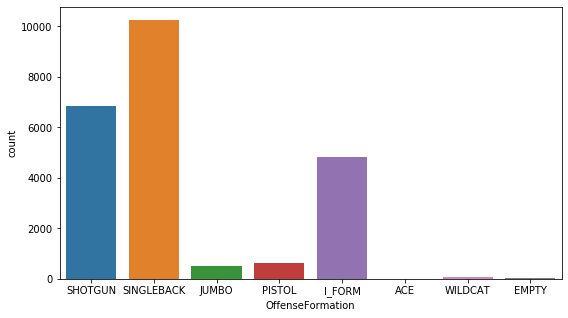

In [395]:
print(rush[["Yards","OffenseFormation"]].groupby(["OffenseFormation"], as_index = False).agg(['mean', 'count']) )
# singleback, shotfun, and I_form are the most common formations 
plt.figure(figsize=(9,5))
sns.countplot(x=rush.OffenseFormation,data=rush)
plt.show()

#### DefendersInTheBox vs. Yards

In [396]:
print("There are {} plays with missing values in this column".format(pd.isnull(rush.DefendersInTheBox).sum()))

There are 3 plays with missing values in this column


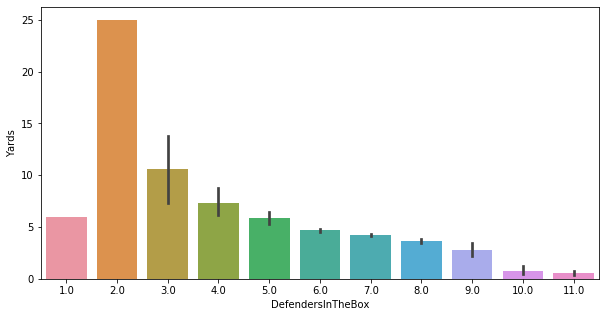

In [397]:
plt.figure(figsize=(10,5))
sns.barplot(x=rush.DefendersInTheBox,y=rush.Yards,data=rush)
plt.show()

In [398]:
print(rush[["Yards","DefendersInTheBox"]].groupby(["DefendersInTheBox"], as_index = False).agg(['mean', 'count']) )
# good variation in this feature- this will be helpful

                       Yards      
                        mean count
DefendersInTheBox                 
1.0                 6.000000     1
2.0                25.000000     1
3.0                10.611111    18
4.0                 7.347458   118
5.0                 5.826023   684
6.0                 4.694505  6933
7.0                 4.212492  9478
8.0                 3.638302  4971
9.0                 2.821604   611
10.0                0.796791   187
11.0                0.542169   166


In [399]:
rush['DefendersInTheBox_percent'] = rush['DefendersInTheBox']/11

In [400]:
rush['DefendersInTheBox_percent'] = rush['DefendersInTheBox_percent'].interpolate()

#### (TimeSnap - TimeHandoff) vs. Yards 

In [401]:
rush[["TimeSnap", "TimeHandoff"]].dtypes

TimeSnap       object
TimeHandoff    object
dtype: object

In [402]:
import datetime

rush['TimeHandoff'] = rush['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
rush['TimeSnap'] = rush['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

#rush["TimeSnap"] = pd.to_datetime(rush["TimeSnap"])
#rush["TimeHandoff"] = pd.to_datetime(rush["TimeHandoff"])
#.dt.strftime("%Y-%m-%d")
#do datedif to get difference in datetimes

In [403]:
rush["snap2handoff"] = rush.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)

#(rush["TimeHandoff"] - rush["TimeSnap"]).astype('timedelta64[s]')

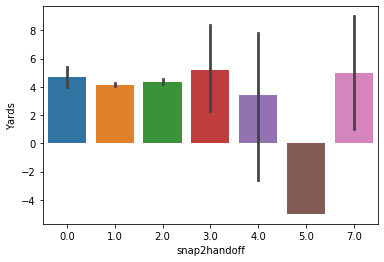

                 Yards       
                  mean  count
snap2handoff                 
0.0           4.726829    205
1.0           4.155770  16672
2.0           4.342875   6253
3.0           5.212121     33
4.0           3.400000      5
5.0          -5.000000      1
7.0           5.000000      2


In [404]:
sns.barplot(x=rush.snap2handoff,y=rush.Yards,data=rush)
plt.show()
print(rush[["Yards","snap2handoff"]].groupby(["snap2handoff"], as_index = False).agg(['mean', 'count']) )

In [405]:
#lump snap to handoff over 2 seconds as 3 seconds
rush["snap2handoff"] = rush["snap2handoff"].apply(lambda x: 3 if x > 2 else x)

#### Turf vs Yards

In [406]:
"""list(rush['Turf'].unique())

Turf_map={"Grass":"Grass","grass":"Grass",'Twenty-Four/Seven Turf':"FieldTurf",
          'DD GrassMaster':'DD GrassMaster','A-Turf Titan':'A-Turf Titan',
          "FieldTurf 360":"FieldTurf","FieldTurf360":"FieldTurf",'UBU Sports Speed S5-M':'UBU Sports Speed S5-M',
         "Field Turf":"FieldTurf","Natural":"Natural", "Natural Grass":"Natural",
         "Natural grass":"Natural","Naturall Grass":"Natural",'SISGrass':'Grass',
          'UBU Speed Series-S5-M':"UBU Speed Series-S5-M","Artifical":"Artifical","Artificial":"Artifical"}

rush["Turf"]=rush["Turf"].map(Turf_map)"""

'list(rush[\'Turf\'].unique())\n\nTurf_map={"Grass":"Grass","grass":"Grass",\'Twenty-Four/Seven Turf\':"FieldTurf",\n          \'DD GrassMaster\':\'DD GrassMaster\',\'A-Turf Titan\':\'A-Turf Titan\',\n          "FieldTurf 360":"FieldTurf","FieldTurf360":"FieldTurf",\'UBU Sports Speed S5-M\':\'UBU Sports Speed S5-M\',\n         "Field Turf":"FieldTurf","Natural":"Natural", "Natural Grass":"Natural",\n         "Natural grass":"Natural","Naturall Grass":"Natural",\'SISGrass\':\'Grass\',\n          \'UBU Speed Series-S5-M\':"UBU Speed Series-S5-M","Artifical":"Artifical","Artificial":"Artifical"}\n\nrush["Turf"]=rush["Turf"].map(Turf_map)'

In [407]:
#Cleanup on the turf types to just two simple categorical variables - Turf and Natural Grass
#Cleanup on the turf types to just two simple categorical variables - Turf and Natural Grass
rush.loc[rush['Turf'] == 'Artifical', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'Artificial', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'SISGrass', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'DD GrassMaster', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'FieldTurf', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'A-Turf Titan', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'Field Turf', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'Twenty-Four/Seven Turf', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'Field turf', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'FieldTurf360', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'FieldTurf 360', 'Turf'] = 'Turf'

rush.loc[rush['Turf'] == 'Natural', 'Turf'] = 'Natural Grass'
rush.loc[rush['Turf'] == 'Natural grass', 'Turf'] = 'Natural Grass'
rush.loc[rush['Turf'] == 'Naturall Grass', 'Turf'] = 'Natural Grass'
rush.loc[rush['Turf'] == 'natural grass', 'Turf'] = 'Natural Grass'
rush.loc[rush['Turf'] == 'Grass', 'Turf'] = 'Natural Grass'
rush.loc[rush['Turf'] == 'grass', 'Turf'] = 'Natural Grass'

rush.loc[rush['Turf'] == 'UBU Sports Speed S5-M', 'Turf'] = 'Turf'
rush.loc[rush['Turf'] == 'UBU Speed Series-S5-M', 'Turf'] = 'Turf'

In [408]:
print(rush[["Yards","Turf"]].groupby(["Turf"], as_index = False).agg(['mean', 'count']) )
#we need to go further

                  Yards       
                   mean  count
Turf                          
Natural Grass  4.194295  12831
Turf           4.234720  10340


#### Stadium

In [409]:
rush["Stadium"] = rush["Stadium"].apply(lambda x: x.lower())
print("The NFL ony has 31 full-time stadiums for 32 teams. The dataset shows: {}. \nThere were 3 special stadiums in the dataset".format(len(rush.Stadium.unique())))

The NFL ony has 31 full-time stadiums for 32 teams. The dataset shows: 51. 
There were 3 special stadiums in the dataset


In [410]:
#name cleanup
rush.loc[rush['Stadium'] == 'centurylink', 'Stadium'] = 'centuryfield'
rush.loc[rush['Stadium'] == 'centurylink field', 'Stadium'] = 'centuryfield'
rush.loc[rush['Stadium'] == 'firstenergy', 'Stadium'] = 'first energy stadium'
rush.loc[rush['Stadium'] == 'firstenergy stadium', 'Stadium'] = 'first energy stadium'
rush.loc[rush['Stadium'] == 'firstenergystadium', 'Stadium'] = 'first energy stadium'
rush.loc[rush['Stadium'] == 'los angeles memorial coliesum', 'Stadium'] = 'los angeles memorial coliseum'
rush.loc[rush['Stadium'] == 'm & t bank stadium', 'Stadium'] = 'm&t bank stadium'
rush.loc[rush['Stadium'] == 'm&t stadium', 'Stadium'] = 'm&t bank stadium'
rush.loc[rush['Stadium'] == 'mercedes-benz dome', 'Stadium'] = 'mercedes-benz stadium'
rush.loc[rush['Stadium'] == 'metlife', 'Stadium'] = 'metlife stadium'
rush.loc[rush['Stadium'] == 'nrg', 'Stadium'] = 'nrg stadium'
rush.loc[rush['Stadium'] == 'oakland alameda-county coliseum', 'Stadium'] = 'oakland-alameda county coliseum'
rush.loc[rush['Stadium'] == 'paul brown stdium', 'Stadium'] = 'paul brown stadium'
rush.loc[rush['Stadium'] == 'twickenham', 'Stadium'] = 'twickenham stadium'
rush.loc[rush['Stadium'] == 'broncos stadium at mile high', 'Stadium'] = 'empower stadium at mile high'
rush.loc[rush['Stadium'] == 'sports authority field at mile high', 'Stadium'] = 'empower stadium at mile high'
rush.loc[rush['Stadium'] == 'everbank field', 'Stadium'] = 'tiaa bank field'
rush.loc[rush['Stadium'] == 'university of phoenix stadium', 'Stadium'] = 'state farm stadium'

#### Stadium Type vs Yards

In [411]:
"""
list(rush['StadiumType'].unique())

Type_map={'Outdoor':'Outdoor','Outdoors':'Outdoor','Oudoor':'Outdoor'
         ,'Ourdoor':'Outdoor','Outside':'Outdoor','Outdor':'Outdoor'
         ,'Outddors':'Outdoor','Retractable Roof':'Retractable Roof',
         'Retr. Roof-Closed':'Retractable Roof','Retr. Roof - Closed':'Retractable Roof',
         'Retr. Roof Closed':'Retractable Roof',  "Outdoor Retr Roof-Open":"Outdoor",
         "Indoors":"Indoor","Indoor":"Indoor","Indoor, Roof Closed":"Indoor",
         "Doom":"Dome","Domed, closed":"Dome","Domed, open":"Dome","Closed Dome":"Dome"
         ,"Bowl":"Bowl","Open":"Outdoor","Cloudy":"Outdoor","Domed, Open":"Dome"
         ,'Retr. Roof-Open':'Retractable Roof',"Retr. Roof - Open":"Retractable Roof",
          "Indoor, Open Roof":"Indoor","Heinz Field" :"Heinz Field"}"""

'\nlist(rush[\'StadiumType\'].unique())\n\nType_map={\'Outdoor\':\'Outdoor\',\'Outdoors\':\'Outdoor\',\'Oudoor\':\'Outdoor\'\n         ,\'Ourdoor\':\'Outdoor\',\'Outside\':\'Outdoor\',\'Outdor\':\'Outdoor\'\n         ,\'Outddors\':\'Outdoor\',\'Retractable Roof\':\'Retractable Roof\',\n         \'Retr. Roof-Closed\':\'Retractable Roof\',\'Retr. Roof - Closed\':\'Retractable Roof\',\n         \'Retr. Roof Closed\':\'Retractable Roof\',  "Outdoor Retr Roof-Open":"Outdoor",\n         "Indoors":"Indoor","Indoor":"Indoor","Indoor, Roof Closed":"Indoor",\n         "Doom":"Dome","Domed, closed":"Dome","Domed, open":"Dome","Closed Dome":"Dome"\n         ,"Bowl":"Bowl","Open":"Outdoor","Cloudy":"Outdoor","Domed, Open":"Dome"\n         ,\'Retr. Roof-Open\':\'Retractable Roof\',"Retr. Roof - Open":"Retractable Roof",\n          "Indoor, Open Roof":"Indoor","Heinz Field" :"Heinz Field"}'

In [412]:
#rush["StadiumType"]=rush["StadiumType"].map(Type_map)

In [413]:
print(rush[["Yards","StadiumType"]].groupby(["StadiumType"], as_index = False).agg(['mean', 'count']) )

                           Yards       
                            mean  count
StadiumType                            
Bowl                    3.727273     44
Closed Dome             3.886598     97
Cloudy                  2.200000     35
Dome                    4.038071    788
Dome, closed            3.530120     83
Domed                   4.349398     83
Domed, Open             4.400000     35
Domed, closed           4.565056    269
Domed, open             3.934426    122
Heinz Field             5.024390     41
Indoor                  3.865123    734
Indoor, Open Roof       4.717949     39
Indoor, Roof Closed     4.979167     48
Indoors                 4.075929   1857
Open                    4.034325    437
Oudoor                  3.888889     54
Ourdoor                 3.256410     39
Outddors                4.909091     44
Outdoor                 4.273176  12168
Outdoor Retr Roof-Open  2.200000     40
Outdoors                4.270297   3067
Outdor                  3.358974     39


In [414]:
#cleaning up the StadiumTypes to just two possibilities for simple categorical variable use
rush.loc[rush['StadiumType'] == 'Cloudy', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Domed', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Dome', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Dome, closed', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Closed Dome', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Domed, closed', 'StadiumType'] = 'Closed'

rush.loc[rush['StadiumType'] == 'Domed, Open', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Bowl', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Domed, open', 'StadiumType'] = 'Open'

rush.loc[rush['StadiumType'] == 'Heinz Field', 'StadiumType'] = 'Open'

rush.loc[rush['StadiumType'] == 'Indoors', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Indoor', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Indoor, Open Roof', 'StadiumType'] = 'Open'

rush.loc[rush['StadiumType'] == 'Indoor, Roof Closed', 'StadiumType'] = 'Closed'

rush.loc[rush['StadiumType'] == 'Oudoor', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Outdoor', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Ourdoor', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Outddors', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Outdoors', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Outdor', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Outside', 'StadiumType'] = 'Open'

rush.loc[rush['StadiumType'] == 'Outdoor Retr Roof-Open', 'StadiumType'] = 'Open'

rush.loc[rush['StadiumType'] == 'Retr. Roof Closed', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Retr. Roof-Closed', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Retr. Roof - Closed', 'StadiumType'] = 'Closed'
rush.loc[rush['StadiumType'] == 'Retr. Roof-Open', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Retr. Roof - Open', 'StadiumType'] = 'Open'
rush.loc[rush['StadiumType'] == 'Retractable Roof', 'StadiumType'] = 'Closed'

In [415]:
rush.groupby(['StadiumType'])['StadiumType'].count()

StadiumType
Closed     5383
Open      16291
Name: StadiumType, dtype: int64

In [416]:
rush.StadiumType.value_counts()

Open      16291
Closed     5383
Name: StadiumType, dtype: int64

In [417]:
#try to fill the missing values
rush["StadiumType"] = rush[["Stadium","StadiumType"]].groupby(["Stadium"]).transform(lambda x: x.ffill().bfill()) # x.fillna(x.mode()))
rush["StadiumType"] = rush["StadiumType"].fillna("Open")

#### GameWeather vs. Yards

In [418]:
list(rush['GameWeather'].unique())

['Clear and warm',
 'Sun & clouds',
 'Sunny',
 'Controlled Climate',
 'Mostly Sunny',
 'Clear',
 nan,
 'Indoor',
 'Mostly Cloudy',
 'Mostly Coudy',
 'Partly sunny',
 'Partly Cloudy',
 'Cloudy',
 'Sunny, highs to upper 80s',
 'Indoors',
 'Light Rain',
 'Showers',
 'Partly cloudy',
 'Partly Sunny',
 '30% Chance of Rain',
 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
 'Rain',
 'Cloudy, fog started developing in 2nd quarter',
 'Coudy',
 'Rain likely, temps in low 40s.',
 'Cold',
 'N/A (Indoors)',
 'Clear skies',
 'cloudy',
 'Fair',
 'Mostly cloudy',
 'Cloudy, chance of rain',
 'Heavy lake effect snow',
 'Party Cloudy',
 'Cloudy, light snow accumulating 1-3"',
 'Cloudy and cold',
 'Snow',
 'Hazy',
 'Scattered Showers',
 'Cloudy and Cool',
 'N/A Indoor',
 'Rain Chance 40%',
 'Clear and sunny',
 'Mostly sunny',
 'Sunny and warm',
 'Partly clear',
 'Cloudy, 50% change of rain',
 'Clear and Sunny',
 'Sunny, Windy',
 'Clear and Cool',
 'Sunny and clear',
 '

In [419]:
rush['GameWeather'] = rush['GameWeather'].str.lower()
indoor = "indoor"
rush['GameWeather'] = rush['GameWeather'].apply(lambda x: indoor if not pd.isna(x) and indoor in x else x)
rush['GameWeather'] = rush['GameWeather'].apply(lambda x: x.replace('coudy', 'cloudy').replace('clouidy', 'cloudy').replace('party', 'partly') if not pd.isna(x) else x)
rush['GameWeather'] = rush['GameWeather'].apply(lambda x: x.replace('clear and sunny', 'sunny and clear') if not pd.isna(x) else x)
rush['GameWeather'] = rush['GameWeather'].apply(lambda x: x.replace('skies', '').replace("mostly", "").strip() if not pd.isna(x) else x)


In [420]:
#"Scoring" the weather - obviously the indoor or climate controlled weather is the best for playing conditions
def map_weather(txt):
    ans = 1
    if pd.isna(txt):
        return 0
    if 'partly' in txt:
        return ans
    if 'climate controlled' in txt or 'indoor' in txt:
        return ans*3
    if 'sunny' in txt or 'sun' in txt:
        return ans*2
    if 'clear' in txt:
        return ans
    if 'cloudy' in txt:
        return -ans
    if 'rain' in txt or 'rainy' in txt:
        return -2*ans
    if 'snow' in txt:
        return -3*ans
    return 0

In [421]:
rush['GameWeather_score'] = rush['GameWeather'].apply(map_weather)

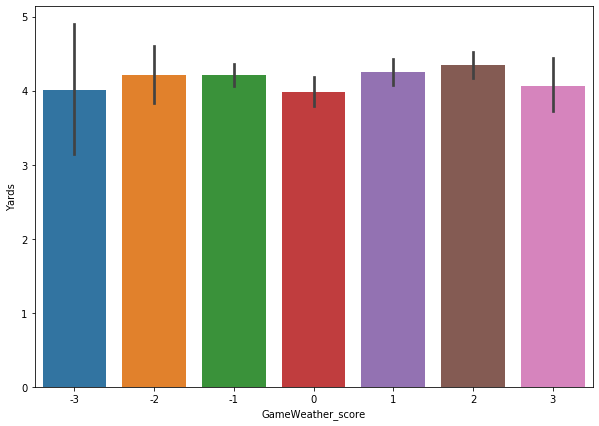

In [422]:
plt.figure(figsize=(10,7))
sns.barplot(x=rush.GameWeather_score,y=rush.Yards,data=rush)
plt.show()

In [423]:
rush["GameWeather_ok"] = rush['GameWeather_score'].apply(lambda x: 1 if x > -2 else 0)

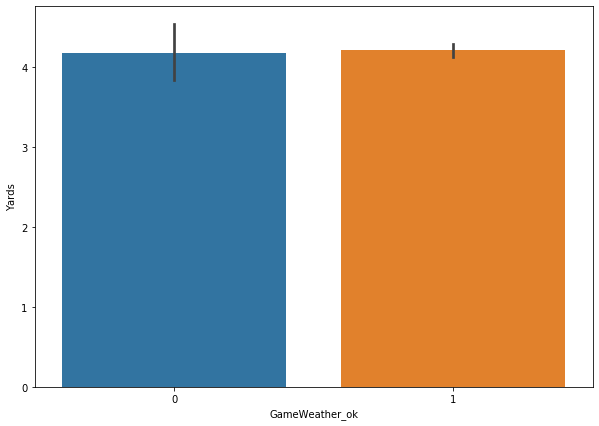

In [424]:
plt.figure(figsize=(10,7))
sns.barplot(x=rush.GameWeather_ok,y=rush.Yards,data=rush)
plt.show()
#use weather score - better differentiation

#### Windspeed

In [425]:
def str_to_float(txt):
    try:
        return float(txt)
    except:
        return -1

In [426]:
from string import punctuation

def clean_WindDirection(txt):
    if pd.isna(txt):
        return np.nan
    txt = txt.lower()
    txt = ''.join([c for c in txt if c not in punctuation])
    txt = txt.replace('from', '')
    txt = txt.replace(' ', '')
    txt = txt.replace('north', 'n')
    txt = txt.replace('south', 's')
    txt = txt.replace('west', 'w')
    txt = txt.replace('east', 'e')
    return txt

In [427]:
def transform_WindDirection(txt):
    if pd.isna(txt):
        return np.nan
    
    if txt=='n':
        return 0
    if txt=='nne' or txt=='nen':
        return 1/8
    if txt=='ne':
        return 2/8
    if txt=='ene' or txt=='nee':
        return 3/8
    if txt=='e':
        return 4/8
    if txt=='ese' or txt=='see':
        return 5/8
    if txt=='se':
        return 6/8
    if txt=='ses' or txt=='sse':
        return 7/8
    if txt=='s':
        return 8/8
    if txt=='ssw' or txt=='sws':
        return 9/8
    if txt=='sw':
        return 10/8
    if txt=='sww' or txt=='wsw':
        return 11/8
    if txt=='w':
        return 12/8
    if txt=='wnw' or txt=='nww':
        return 13/8
    if txt=='nw':
        return 14/8
    if txt=='nwn' or txt=='nnw':
        return 15/8
    return np.nan

In [428]:
#Turning windspeed into a number we can use 
rush['WindSpeed'] = rush['WindSpeed'].astype(str)
rush['WindSpeed'] = rush['WindSpeed'].apply(lambda x: x.replace('mph', '').strip() if not pd.isna(x) else x)
rush['WindSpeed'] = rush['WindSpeed'].apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2 if not pd.isna(x) and '-' in x else x)
rush['WindSpeed'] = rush['WindSpeed'].apply(lambda x: (int(x.split()[0])+int(x.split()[-1]))/2 if not pd.isna(x) and type(x)!=float and 'gusts up to' in x else x)

rush['WindSpeed'] = rush['WindSpeed'].apply(str_to_float)

rush.groupby(['WindDirection'])['WindDirection'].count()

WindDirection
1                    51
13                   38
8                    52
Calm                 48
E                   583
EAST                 41
ENE                 491
ESE                 449
East                334
East North East      34
East Southeast       49
From ESE             31
From NNE             44
From NNW             42
From S              143
From SSE             40
From SSW             44
From SW             176
From W               45
From WSW             43
N                  1054
N-NE                 46
NE                 1375
NNE                 927
NNW                 638
NW                 1238
North               781
North East           50
North/Northwest      44
NorthEast           146
Northeast           166
Northwest           185
S                   972
SE                 1172
SSE                 608
SSW                 905
SW                 1174
South               924
South Southeast      43
South Southwest      39
SouthWest            97
So

In [429]:
rush['WindDirection'] = rush['WindDirection'].apply(clean_WindDirection)

rush['WindDirection'] = rush['WindDirection'].apply(transform_WindDirection)

In [430]:
#interpolate missing values
rush['WindDirection'] = rush['WindDirection'].interpolate()

#### Temperature vs Yards

In [431]:
#convert to Celcius
rush["Temperature_C"] = (rush["Temperature"] - 32) * (5/9)

temps = rush.loc[pd.notnull(rush["Temperature_C"]),["Temperature_C"]]
sns.boxplot(temps.Temperature_C)
plt.show()
print(temps.Temperature_C.describe())
#plt.box(temps.Temperature)
#pd.isnull(rush.Temperature).sum()

plt.scatter(x = rush["Temperature_C"], y = rush["Yards"])

In [432]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = rush['Temperature_C'].quantile(quantile_list)
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']

rush['Temperature_C_quantile_range'] = pd.qcut(
    rush['Temperature_C'],
    q=quantile_list)
rush['Temperature_C_quantile_label'] = pd.qcut(
    rush['Temperature_C'],
    q=quantile_list,
    labels=quantile_labels)

plt.figure(figsize=(10,7))
sns.barplot(x=rush.Temperature_C_quantile_label,y=rush.Yards,data=rush)
plt.show()

#### Humidity

plt.scatter(x = rush["Humidity"], y = rush["Yards"])

In [433]:
rush["Weather_IsDry"] = rush['Humidity'].apply(lambda x: 1 if x > 0 else 0)

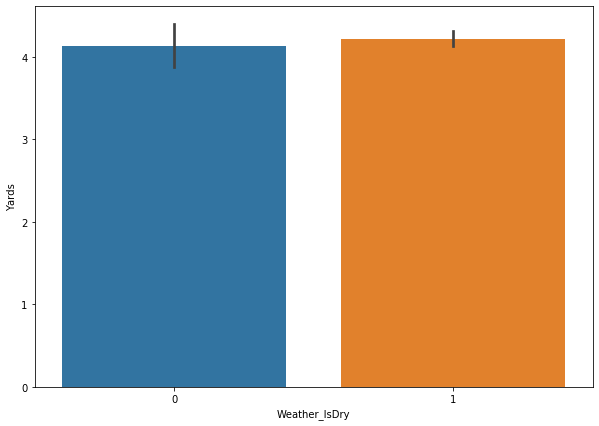

In [434]:
plt.figure(figsize=(10,7))
sns.barplot(x=rush.Weather_IsDry,y=rush.Yards,data=rush)
plt.show()

#### Position vs. Yards

In [435]:
list(rush.Position.unique())

['RB', 'WR', 'FB', 'HB', 'QB', 'TE', 'CB', 'DT', 'DE']

#### Player Height

In [436]:
from operator import add

In [437]:
foot=[int(ht[0]) for ht in rush.PlayerHeight.str.split('-')]
inches=[int(ht[1]) for ht in rush.PlayerHeight.str.split('-')]

In [438]:
#convert height to cm
rush["height_cm"] =list(map(add,[x*30.48 for x in foot],[x*2.54 for x in inches]))

#### Player Weight

In [439]:
#convert weight to kg
rush["weight_kg"] = rush["PlayerWeight"]/2.205

#### Player Age

In [440]:
import time
import datetime
time.strftime("%m/%d/%Y")

'12/04/2019'

In [441]:
#rush["PlayerBirthDate"] = pd.to_datetime(rush["PlayerBirthDate"])
rush['PlayerBirthDate'] = rush['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

In [442]:
seconds_in_year = 60*60*24*365.25
rush['PlayerAge'] = rush.apply(lambda row: (row['TimeHandoff']-row['PlayerBirthDate']).total_seconds()/seconds_in_year, axis=1)

In [443]:
#technically you should calculate this as age at the time of the play but will do a quick calculation for now by using Today: 11.14.2019
rush["PlayerAge"] = [int(np.datetime64("2019") - np.datetime64(i, "Y")) for i in rush.PlayerBirthDate]


#### Player BMI

In [444]:
#formula for BMI: weight (kg) / [height (cm/100)]2
rush["PlayerBMI"] = rush.weight_kg / ((rush.height_cm/100)**2)

#### Team Score relative to other Team

In [445]:
rush["score_diff"] =  np.where(rush.Team == "home", rush.HomeScoreBeforePlay - rush.VisitorScoreBeforePlay, rush.VisitorScoreBeforePlay - rush.HomeScoreBeforePlay)

In [446]:
rush["score_rel"] = rush["score_diff"].apply(lambda x: "Winning" if x > 0 else ("Losing" if x < 0 else "Tied"))

#### Rusher team / Opposing Team

In [447]:
rush["rush_team"] =  np.where(rush.Team == "home", rush.HomeTeamAbbr, rush.VisitorTeamAbbr)
#make sure it matches rush.PosessionTeam

In [448]:
rush["def_team"] =  np.where(rush.Team == "home", rush.VisitorTeamAbbr, rush.HomeTeamAbbr)

#### Game Clock

In [449]:
def strtoseconds(txt):
    txt = txt.split(':')
    ans = int(txt[0])*60 + int(txt[1]) + int(txt[2])/60
    return ans

In [450]:
# need to convert to a bounded time metric
rush['GameClock_sec'] = rush['GameClock'].apply(strtoseconds)

In [451]:
def time_elapsed(row):
    val = 0
    if (row["Quarter"] == 1):
        #15min - GameClock_sec
        val = 900 - row["GameClock_sec"]
    elif (row["Quarter"] == 2):
        #15min + (15min - GameClock_sec)
        val = 900 + (900 - row["GameClock_sec"])
    elif (row["Quarter"] == 3):
        #30min + (15min - GameClock_sec)
        val = 1800 + (900 - row["GameClock_sec"])
    elif (row["Quarter"] == 4):
        #45min + (15min - GameClock_sec)
        val = 2700 + (900 - row["GameClock_sec"])
    elif (row["Quarter"] == 5):
        #60min + (10min - GameClock_sec) - starting in 2017, the NFL set OT time to 10mins 
        val = 3600 + (600 - row["GameClock_sec"])
    else : 
        #return "error"
        val = -1
    return val

In [452]:
#Total time elapsed in the game starting at 0, no upper bound due to OT 
rush['TimeElapsed'] = rush.apply(time_elapsed, axis='columns')

#### OffensePersonnel / DefensePersonnel

In [453]:
rush[["DefensePersonnel","OffensePersonnel"]].head(10) 
#field values must be edited to work with quantity of each 

,DefensePersonnel,OffensePersonnel
18,"2 DL, 3 LB, 6 DB","1 RB, 1 TE, 3 WR"
40,"2 DL, 3 LB, 6 DB","1 RB, 1 TE, 3 WR"
62,"2 DL, 3 LB, 6 DB","1 RB, 1 TE, 3 WR"
84,"4 DL, 4 LB, 3 DB","6 OL, 2 RB, 2 TE, 0 WR"
98,"3 DL, 2 LB, 6 DB","1 RB, 3 TE, 1 WR"
128,"2 DL, 3 LB, 6 DB","1 RB, 1 TE, 3 WR"
149,"3 DL, 4 LB, 4 DB","1 RB, 2 TE, 2 WR"
172,"3 DL, 4 LB, 4 DB","6 OL, 1 RB, 2 TE, 1 WR"
186,"3 DL, 2 LB, 6 DB","2 RB, 1 TE, 2 WR"
208,"3 DL, 2 LB, 6 DB","1 RB, 2 TE, 2 WR"


In [454]:
offense_personnel_types = ["OL", "QB", "RB", "TE", "WR", "DL", "LB", "DB"]
offense_personnel_extraction = "^(?:(?P<OPOL>[0-9])OL)?,?(?:(?P<OPQB>[0-9])QB)?,?(?:(?P<OPRB>[0-9])RB)?,?(?:(?P<OPTE>[0-9])TE)?,?(?:(?P<OPWR>[0-9])WR)?,?(?:(?P<OPDL>[0-9])DL)?,?(?:(?P<OPLB>[0-9])LB)?,?(?:(?P<OPDB>[0-9])DB)?,?$"
offpersdf = rush["OffensePersonnel"].str.replace(" ","").str.extract(offense_personnel_extraction, expand=True)
offpersdf = offpersdf.fillna(0)
offpersdf = offpersdf.astype({"OPOL": int, "OPQB": int, "OPRB": int, "OPTE": int, "OPWR": int, "OPDL": int, "OPLB": int, "OPDB": int})
rush[["OffensePersonnel-OL", "OffensePersonnel-QB", "OffensePersonnel-RB", "OffensePersonnel-TE",
       "OffensePersonnel-WR", "OffensePersonnel-DL", "OffensePersonnel-LB", "OffensePersonnel-DB"]] = offpersdf[["OPOL", "OPQB", "OPRB", "OPTE", "OPWR", "OPDL", "OPLB", "OPDB"]]

In [455]:
rush[["OffensePersonnel-OL", "OffensePersonnel-QB", "OffensePersonnel-RB", "OffensePersonnel-TE",
       "OffensePersonnel-WR", "OffensePersonnel-DL", "OffensePersonnel-LB", "OffensePersonnel-DB"]].sum()

OffensePersonnel-OL     9438
OffensePersonnel-QB      242
OffensePersonnel-RB    27549
OffensePersonnel-TE    33071
OffensePersonnel-WR    53222
OffensePersonnel-DL      231
OffensePersonnel-LB       27
OffensePersonnel-DB       18
dtype: int64

In [456]:
defense_personnel_types = ["DL", "LB", "DB", "OL"]
defense_personnel_extraction = "^(?:(?P<DPDL>[0-9])DL)?,?(?:(?P<DPLB>[0-9])LB)?,?(?:(?P<DPDB>[0-9])DB)?,?(?:(?P<DPOL>[0-9])OL)?,?$"
defpersdf = rush["DefensePersonnel"].str.replace(" ","").str.extract(defense_personnel_extraction, expand=True)
defpersdf = defpersdf.fillna(0)
defpersdf = defpersdf.astype({"DPDL": int, "DPLB": int, "DPDB": int, "DPOL": int})

rush[["DefensePersonnel-DL", "DefensePersonnel-LB", "DefensePersonnel-DB", "DefensePersonnel-OL"]] = defpersdf[["DPDL", "DPLB", "DPDB", "DPOL"]]

In [457]:
rush[["DefensePersonnel-DL", "DefensePersonnel-LB", "DefensePersonnel-DB", "DefensePersonnel-OL"]].sum()

DefensePersonnel-DL     80503
DefensePersonnel-LB     68751
DefensePersonnel-DB    105612
DefensePersonnel-OL        15
dtype: int64

#### Play Direction

#### Week

#### Play Direction fix

In [458]:
rush['PlayDirection_right'] = rush['PlayDirection'].apply(lambda x: x.strip() == 'right')
rush['X_fixed'] = rush.apply(lambda row: row['X'] if row['PlayDirection'] else 120-row['X'], axis=1)

In [459]:
#from https://www.kaggle.com/scirpus/hybrid-gp-and-nn
def new_orientation(angle, play_direction):
    if play_direction == 0:
        new_angle = 360.0 - angle
        if new_angle == 360.0:
            new_angle = 0.0
        return new_angle
    else:
        return angle

In [460]:
rush['Orientation_fixed'] = rush.apply(lambda row: new_orientation(row['Orientation'], row['PlayDirection']), axis=1)
rush['Dir_fixed'] = rush.apply(lambda row: new_orientation(row['Dir'], row['PlayDirection']), axis=1)

#### Field Zones

In [461]:
#offensive/defensive side of field. 1 == on scoring side
rush["OnScoringSide"] = np.where((rush["YardLine"] == 50) | (rush["PossessionTeam"] != rush["FieldPosition"]),1,0)

#Yards left to End Zone
rush['YardsLeft'] = np.where(rush['OnScoringSide'] == 1, rush['YardLine'], 100-rush['YardLine'])

#Red Zone - The redzone is considered the last 20 yards to the endzone
rush["Red_Zone"] = np.where(rush["YardsLeft"] <= 20, 1, 0)

#Dead Zone - The dead zone may exist anywhere from the opponent's 33 to 43-yard line.
## It is where an offence is on their opponent's side of the field, but kicking a field goal would likely be unsuccessful and punting the ball would not dramatically change field position
rush["Dead_Zone"] = np.where((rush["YardsLeft"] >= 33) & (rush["YardsLeft"] <= 43),1,0)

#Field Goal Range - For most NFL kickers, the 35-yard line is typically the limit of their field goal range
## A successful kick from the 35 yd line would be 52-yard kick (35 yards + 10 endone + avg. 7 yd drop back from line of scrimmage)
rush["FG_Range"] = np.where(rush["YardsLeft"] <= 35, 1, 0)

In [462]:
#Yards Left (BIN YARDS LEFT BY 10s)
rush["YardsLeft_Bin"] = pd.cut(rush["YardsLeft"], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"])#, retbins=True, right=False)


In [463]:
rush.isna().sum()/len(rush)

GameId                          0.000000
PlayId                          0.000000
Team                            0.000000
X                               0.000000
Y                               0.000000
S                               0.000000
A                               0.000000
Dis                             0.000000
Orientation                     0.000000
Dir                             0.000000
NflId                           0.000000
DisplayName                     0.000000
JerseyNumber                    0.000000
Season                          0.000000
YardLine                        0.000000
Quarter                         0.000000
GameClock                       0.000000
PossessionTeam                  0.000000
Down                            0.000000
Distance                        0.000000
FieldPosition                   0.000000
HomeScoreBeforePlay             0.000000
VisitorScoreBeforePlay          0.000000
NflIdRusher                     0.000000
OffenseFormation

## Positional data mining

In [464]:
df1 = df.copy()

#### Player Height

In [465]:
from operator import add

In [466]:
foot=[int(ht[0]) for ht in df1.PlayerHeight.str.split('-')]
inches=[int(ht[1]) for ht in df1.PlayerHeight.str.split('-')]

In [467]:
#convert height to cm
df1["height_cm"] =list(map(add,[x*30.48 for x in foot],[x*2.54 for x in inches]))

#### Player Weight

In [468]:
#convert weight to kg
df1["weight_kg"] = df1["PlayerWeight"]/2.205

#### Player Age

In [469]:
import datetime

df1['TimeHandoff'] = df1['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
df1['TimeSnap'] = df1['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

#rush["TimeSnap"] = pd.to_datetime(rush["TimeSnap"])
#rush["TimeHandoff"] = pd.to_datetime(rush["TimeHandoff"])
#.dt.strftime("%Y-%m-%d")
#do datedif to get difference in datetimes

In [470]:
df1['PlayerBirthDate'] = df1['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))

In [471]:
df1.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,height_cm,weight_kg
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,96.145125
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,130.612245
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,122.448980
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,111.111111
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,206,1987-08-17,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,93.424036


In [472]:
df1.head(15)

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,height_cm,weight_kg
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,96.145125
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,130.612245
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,122.448980
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,111.111111
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,206,1987-08-17,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,93.424036
5,2017090700,20170907000118,away,75.06,24.00,1.01,0.32,0.18,308.34,95.01,2543494,Dee Ford,55,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-2,252,1991-03-19,Auburn,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,187.96,114.285714
6,2017090700,20170907000118,away,74.11,16.64,1.11,0.83,0.02,357.23,322.59,2543637,Terrance Mitchell,39,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,5-11,190,1992-05-17,Oregon,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,180.34,86.167800
7,2017090700,20170907000118,away,73.37,18.73,1.24,0.74,0.13,328.52,270.04,2543851,Phillip Gaines,23,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,193,1991-04-04,Rice,CB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,87.528345
8,2017090700,20170907000118,away,56.63,26.90,0.26,1.86,0.28,344.70,55.31,2550257,Daniel Sorensen,49,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-2,208,1990-03-05,Brigham Young,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,187.96,94.331066
9,2017090700,20170907000118,away,73.35,38.83,4.55,0.76,0.51,75.47,190.84,2552488,Marcus Peters

In [473]:
seconds_in_year = 60*60*24*365.25
df1['PlayerAge'] = df1.apply(lambda row: (row['TimeHandoff']-row['PlayerBirthDate']).total_seconds()/seconds_in_year, axis=1)

In [474]:
#technically you should calculate this as age at the time of the play but will do a quick calculation for now by using Today: 11.14.2019
df1["PlayerAge"] = [int(np.datetime64("2019") - np.datetime64(i, "Y")) for i in df1.PlayerBirthDate]


#### Player BMI

In [475]:
#formula for BMI: weight (kg) / [height (cm/100)]2
df1["PlayerBMI"] = df1.weight_kg / ((df1.height_cm/100)**2)

#### Play Direction fix

In [476]:
df1['PlayDirection_right'] = df1['PlayDirection'].apply(lambda x: x.strip() == 'right')
df1['X_fixed'] = df1.apply(lambda row: row['X'] if row['PlayDirection'] else 120-row['X'], axis=1)

In [477]:
#from https://www.kaggle.com/scirpus/hybrid-gp-and-nn
def new_orientation(angle, play_direction):
    if play_direction == 0:
        new_angle = 360.0 - angle
        if new_angle == 360.0:
            new_angle = 0.0
        return new_angle
    else:
        return angle

In [478]:
df1['Orientation_fixed'] = df1.apply(lambda row: new_orientation(row['Orientation'], row['PlayDirection']), axis=1)
df1['Dir_fixed'] = df1.apply(lambda row: new_orientation(row['Dir'], row['PlayDirection']), axis=1)

In [479]:
for x,y  in zip(sorted(df1['HomeTeamAbbr'].unique()), sorted(df1['PossessionTeam'].unique())):
    if x!=y:
        print(x + " " + y)

ARI ARZ
BAL BLT
CLE CLV
HOU HST


In [480]:
map_abbr = {'ARI': 'ARZ', 'BAL': 'BLT', 'CLE': 'CLV', 'HOU': 'HST'}
for abb in df1['PossessionTeam'].unique():
    map_abbr[abb] = abb

In [481]:
df1['PossessionTeam'] = df1['PossessionTeam'].map(map_abbr)
df1['HomeTeamAbbr'] = df1['HomeTeamAbbr'].map(map_abbr)
df1['VisitorTeamAbbr'] = df1['VisitorTeamAbbr'].map(map_abbr)

In [482]:
#set index to playID
df1 = df1.set_index("PlayId")

In [483]:
df1['position_count'] = df1.groupby(['PlayId', 'Position']).cumcount()

In [484]:
df1['Position'] = df1.Position + df1.position_count.astype(str)

In [485]:
# creating defense/offense distinction - only want defensive players(0)
#df1['off_def'] = np.where(((df1["Team"] == 'away') & (df1["VisitorTeamAbbr"] == df1["PossessionTeam"])) | ((df1["Team"] == 'home') & (df1["HomeTeamAbbr"] == df1["PossessionTeam"])),1,0)
df1['offense_or_defense'] = np.where(((df1.PossessionTeam == df1.HomeTeamAbbr) & (df1.Team == "home"))|((df1.PossessionTeam == df1.VisitorTeamAbbr) & (df1.Team == "away")),1,0)

In [486]:
df1.groupby([ 'offense_or_defense'])['offense_or_defense'].count()

offense_or_defense
0    254881
1    254881
Name: offense_or_defense, dtype: int64

In [487]:
df1[(df1['offense_or_defense'] == 0) & (df1['Position'] == 'WR0')]

,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,height_cm,weight_kg,PlayerAge,PlayerBMI,PlayDirection_right,X_fixed,Orientation_fixed,Dir_fixed,position_count,offense_or_defense
PlayId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20171105053963,2017110505,away,67.15,44.54,2.37,2.41,0.31,344.82,291.64,2558186,Brendan Langley,27,2017,40,4,02:55:00,PHI,1,10,PHI,51,23,2555461,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",left,2017-11-05 21:11:44,2017-11-05 21:11:43,26,6-0,199,1994-10-16,Lamar,WR0,PHI,DEN,9,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,61.0,89.0,5,SE,182.88,90.249433,25,26.984356,False,67.15,344.82,291.64,0,0
20171105053984,2017110505,away,41.71,43.04,2.16,1.54,0.42,1.40,244.47,2558186,Brendan Langley,27,2017,34,4,02:09:00,PHI,1,10,DEN,51,23,2555461,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",left,2017-11-05 21:12:30,2017-11-05 21:12:29,2,6-0,199,1994-10-16,Lamar,WR0,PHI,DEN,9,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,61.0,89.0,5,SE,182.88,90.249433,25,26.984356,False,41.71,1.40,244.47,0,0
20171105054022,2017110505,away,40.87,34.21,1.81,1.27,0.38,15.44,200.78,2558186,Brendan Langley,27,2017,32,4,02:00:00,PHI,2,8,DEN,51,23,2555461,SINGLEBACK,"1 RB, 2 TE, 2 WR",9.0,"3 DL, 4 LB, 4 DB",left,2017-11-05 21:15:35,2017-11-05 21:15:34,0,6-0,199,1994-10-16,Lamar,WR0,PHI,DEN,9,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,61.0,89.0,5,SE,182.88,90.249433,25,26.984356,False,40.87,15.44,200.78,0,0
20171105054060,2017110505,away,39.40,36.36,4.20,3.82,0.36,264.12,295.26,2558186,Brendan Langley,27,2017,32,4,01:53:00,PHI,3,8,DEN,51,23,2555461,SINGLEBACK,"1 RB, 2 TE, 2 WR",9.0,"3 DL, 4 LB, 4 DB",left,2017-11-05 21:16:27,2017-11-05 21:16:25,0,6-0,199,1994-10-16,Lamar,WR0,PHI,DEN,9,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,61.0,89.0,5,SE,182.88,90.249433,25,26.984356,False,39.40,264.12,295.26,0,0
20171105054098,2017110505,away,39.53,42.61,3.11,2.42,0.36,46.45,250.75,2558186,Brendan Langley,27,2017,32,4,01:46:00,PHI,4,8,DEN,51,23,2555461,SINGLEBACK,"1 RB, 2 TE, 2 WR",9.0,"3 DL, 4 LB, 4 DB",left,2017-11-05 21:17:29,2017-11-05 21:17:28,-3,6-0,199,1994-10-16,Lamar,WR0,PHI,DEN,9,Lincoln Financial Field,"Philadelphia, Pa.",Outdoor,Grass,Cloudy,61.0,89.0,5,SE,182.88,90.249433,25,26.984356,False,39.53,46.45,250.75,0,0
20171126100329,2017112610,away,70.74,10.72,1.08,1.41,0.12,350.23,51.75,2558186,Brendan Langley,27,2017,35,1,11:03:00,OAK,1,10,OAK,0,0,2555464,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"2 DL, 4 LB, 5 DB",left,2017-11-26 21:41:28,2017-11-26 21:41:27,2,6-0,199,1994-10-16,Lamar,WR0,OAK,DEN,12,Oakland-Alameda County Coliseum,"Oakland, CA",Outdoor,Natural Grass,Cloudy,61.0,95.0,13 MPH,South,182.88,90.249433,25,26.984356,False,70.74,350.23,51.75,0,0
20171126100350,2017112610,away,68.04,7.44,2.40,2.65,0.26,290.26,297.79,2558186,Brendan Langley,27,2017,37,1,10:25:00,OAK,2,8,OAK,0,0,2495663,SHOTGUN,"1 RB, 0 TE, 4 WR",6.0,"2 DL, 4 LB, 5 DB",left,2017-11-26 21:42:06,2017-11-26 21:42:05,7,6-0,199,1994-10-16,Lamar,WR0,OAK,DEN,12,Oakland-Alameda County Coliseum,"Oakland, CA",Outdoor,Natural Grass,Cloudy,61.0,95.0,13 MPH,South,182.88,90.249433,25,26.984356,False,68.04,290.26,297.79,0,0
20171126100578,2017112610,away,47.79,8.87,2.79,2.88,0.37,357.35,225.77,2558186,Brendan Langley,27,2017,39,1,05:56:00,OAK,1,10,DEN,0,0,2495663,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,"2 DL, 4 LB, 5 DB",left,2017-11-26 21:53:19,2017-11-26 21:53:17,-1,6-0,199,1994-10-16,Lamar,WR0,OAK,DEN,12,Oakland-Alameda County Coliseum

In [488]:
df1[df1['offense_or_defense'] == 0].groupby(['Position'])['Position'].count()

Position
C0          1
C1          2
CB0     22915
CB1     21804
CB2     10729
CB3      1197
CB4        24
DB0      1705
DB1       189
DB2        35
DB3         2
DE0     20820
DE1     12956
DE2      1941
DE3       160
DL0        17
DT0     20253
DT1     12979
DT2      2191
DT3       192
DT4        13
FB0        80
FB1        24
FS0     18803
FS1      5347
FS2       456
G0          2
G1          1
G2          5
G3          4
ILB0    11528
ILB1     6641
ILB2      369
ILB3        3
LB0      5787
LB1       826
LB2        86
MLB0     9447
MLB1      758
MLB2        3
NT0      7305
NT1       871
NT2        35
OLB0    20844
OLB1    11919
OLB2     1208
OLB3      123
OT0         1
S0       1589
S1         52
SAF0       19
SS0     17474
SS1      2997
SS2        68
SS3         1
WR0        53
WR2        12
WR3        14
WR4         1
Name: Position, dtype: int64

In [489]:
df1 = df1[df1['offense_or_defense'] == 0]

In [490]:
df1.head()

,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,height_cm,weight_kg,PlayerAge,PlayerBMI,PlayDirection_right,X_fixed,Orientation_fixed,Dir_fixed,position_count,offense_or_defense
PlayId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20170907000118,2017090700,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,212,1988-12-29,Tennessee,SS0,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,96.145125,31,28.747153,False,73.91,81.99,177.18,0,0
20170907000118,2017090700,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,288,1989-03-25,Miami,DE0,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,130.612245,30,35.991002,False,74.67,27.61,198.70,0,0
20170907000118,2017090700,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,270,1989-01-21,Georgia,DE1,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,122.448980,30,33.741564,False,74.00,3.01,202.73,1,0
20170907000118,2017090700,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-3,245,1982-11-22,Texas,ILB0,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,190.50,111.111111,37,30.617345,False,71.46,359.77,105.64,0,0
20170907000118,2017090700,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06,2017-09-08 00:44:05,8,6-0,206,1987-08-17,Newberry,FS0,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW,182.88,93.424036,32,27.933554,False,69.32,12.63,164.31,0,0


In [491]:
#positions = df[["PlayId","NflId","NflIdRusher","Team","PossessionTeam","HomeTeamAbbr","VisitorTeamAbbr","X","Y","YardLine","Position"]].pivot(columns="Position").sort_index(axis=1,level=1)
positions = df1[["X_fixed","Y","S","A","Dis","Orientation_fixed","Dir_fixed", "Position", "PlayerAge", "PlayerBMI"]].pivot(columns="Position").sort_index(axis=1,level=1)

In [492]:
positions.columns = ['-'.join(col).strip() for col in positions.columns]

In [493]:
positions = positions.fillna(0)

In [494]:
positions.head()

,A-C0,Dir_fixed-C0,Dis-C0,Orientation_fixed-C0,PlayerAge-C0,PlayerBMI-C0,S-C0,X_fixed-C0,Y-C0,A-C1,Dir_fixed-C1,Dis-C1,Orientation_fixed-C1,PlayerAge-C1,PlayerBMI-C1,S-C1,X_fixed-C1,Y-C1,A-CB0,Dir_fixed-CB0,Dis-CB0,Orientation_fixed-CB0,PlayerAge-CB0,PlayerBMI-CB0,S-CB0,X_fixed-CB0,Y-CB0,A-CB1,Dir_fixed-CB1,Dis-CB1,Orientation_fixed-CB1,PlayerAge-CB1,PlayerBMI-CB1,S-CB1,X_fixed-CB1,Y-CB1,A-CB2,Dir_fixed-CB2,Dis-CB2,Orientation_fixed-CB2,PlayerAge-CB2,PlayerBMI-CB2,S-CB2,X_fixed-CB2,Y-CB2,A-CB3,Dir_fixed-CB3,Dis-CB3,Orientation_fixed-CB3,PlayerAge-CB3,PlayerBMI-CB3,S-CB3,X_fixed-CB3,Y-CB3,A-CB4,Dir_fixed-CB4,Dis-CB4,Orientation_fixed-CB4,PlayerAge-CB4,PlayerBMI-CB4,S-CB4,X_fixed-CB4,Y-CB4,A-DB0,Dir_fixed-DB0,Dis-DB0,Orientation_fixed-DB0,PlayerAge-DB0,PlayerBMI-DB0,S-DB0,X_fixed-DB0,Y-DB0,A-DB1,Dir_fixed-DB1,Dis-DB1,Orientation_fixed-DB1,PlayerAge-DB1,PlayerBMI-DB1,S-DB1,X_fixed-DB1,Y-DB1,A-DB2,Dir_fixed-DB2,Dis-DB2,Orientation_fixed-DB2,PlayerAge-DB2,PlayerBMI-DB2,S-DB2,X_fixed-DB2,Y-DB2,A-DB3,Dir_fixed-DB3,Dis-DB3,Orientation_fixed-DB3,PlayerAge-DB3,PlayerBMI-DB3,S-DB3,X_fixed-DB3,Y-DB3,A-DE0,Dir_fixed-DE0,Dis-DE0,Orientation_fixed-DE0,PlayerAge-DE0,PlayerBMI-DE0,S-DE0,X_fixed-DE0,Y-DE0,A-DE1,Dir_fixed-DE1,Dis-DE1,Orientation_fixed-DE1,PlayerAge-DE1,PlayerBMI-DE1,S-DE1,X_fixed-DE1,Y-DE1,A-DE2,Dir_fixed-DE2,Dis-DE2,Orientation_fixed-DE2,PlayerAge-DE2,PlayerBMI-DE2,S-DE2,X_fixed-DE2,Y-DE2,A-DE3,Dir_fixed-DE3,Dis-DE3,Orientation_fixed-DE3,PlayerAge-DE3,PlayerBMI-DE3,S-DE3,X_fixed-DE3,Y-DE3,A-DL0,Dir_fixed-DL0,Dis-DL0,Orientation_fixed-DL0,PlayerAge-DL0,PlayerBMI-DL0,S-DL0,X_fixed-DL0,Y-DL0,A-DT0,Dir_fixed-DT0,Dis-DT0,Orientation_fixed-DT0,PlayerAge-DT0,PlayerBMI-DT0,S-DT0,X_fixed-DT0,Y-DT0,A-DT1,Dir_fixed-DT1,Dis-DT1,Orientation_fixed-DT1,PlayerAge-DT1,PlayerBMI-DT1,S-DT1,X_fixed-DT1,Y-DT1,A-DT2,Dir_fixed-DT2,Dis-DT2,Orientation_fixed-DT2,PlayerAge-DT2,PlayerBMI-DT2,S-DT2,X_fixed-DT2,Y-DT2,A-DT3,Dir_fixed-DT3,Dis-DT3,Orientation_fixed-DT3,PlayerAge-DT3,PlayerBMI-DT3,S-DT3,X_fixed-DT3,Y-DT3,A-DT4,Dir_fixed-DT4,Dis-DT4,Orientation_fixed-DT4,PlayerAge-DT4,PlayerBMI-DT4,S-DT4,X_fixed-DT4,Y-DT4,A-FB0,Dir_fixed-FB0,Dis-FB0,Orientation_fixed-FB0,PlayerAge-FB0,PlayerBMI-FB0,S-FB0,X_fixed-FB0,Y-FB0,A-FB1,Dir_fixed-FB1,Dis-FB1,Orientation_fixed-FB1,PlayerAge-FB1,PlayerBMI-FB1,S-FB1,X_fixed-FB1,Y-FB1,A-FS0,Dir_fixed-FS0,Dis-FS0,Orientation_fixed-FS0,PlayerAge-FS0,PlayerBMI-FS0,S-FS0,X_fixed-FS0,Y-FS0,A-FS1,Dir_fixed-FS1,Dis-FS1,Orientation_fixed-FS1,PlayerAge-FS1,PlayerBMI-FS1,S-FS1,X_fixed-FS1,Y-FS1,A-FS2,Dir_fixed-FS2,Dis-FS2,Orientation_fixed-FS2,PlayerAge-FS2,PlayerBMI-FS2,S-FS2,X_fixed-FS2,Y-FS2,A-G0,Dir_fixed-G0,Dis-G0,Orientation_fixed-G0,PlayerAge-G0,PlayerBMI-G0,S-G0,X_fixed-G0,Y-G0,A-G1,Dir_fixed-G1,Dis-G1,Orientation_fixed-G1,PlayerAge-G1,PlayerBMI-G1,S-G1,...,Dis-ILB1,Orientation_fixed-ILB1,PlayerAge-ILB1,PlayerBMI-ILB1,S-ILB1,X_fixed-ILB1,Y-ILB1,A-ILB2,Dir_fixed-ILB2,Dis-ILB2,Orientation_fixed-ILB2,PlayerAge-ILB2,PlayerBMI-ILB2,S-ILB2,X_fixed-ILB2,Y-ILB2,A-ILB3,Dir_fixed-ILB3,Dis-ILB3,Orientation_fixed-ILB3,PlayerAge-ILB3,PlayerBMI-ILB3,S-ILB3,X_fixed-ILB3,Y-ILB3,A-LB0,Dir_fixed-LB0,Dis-LB0,Orientation_fixed-LB0,PlayerAge-LB0,PlayerBMI-LB0,S-LB0,X_fixed-LB0,Y-LB0,A-LB1,Dir_fixed-LB1,Dis-LB1,Orientation_fixed-LB1,PlayerAge-LB1,PlayerBMI-LB1,S-LB1,X_fixed-LB1,Y-LB1,A-LB2,Dir_fixed-LB2,Dis-LB2,Orientation_fixed-LB2,PlayerAge-LB2,PlayerBMI-LB2,S-LB2,X_fixed-LB2,Y-LB2,A-MLB0,Dir_fixed-MLB0,Dis-MLB0,Orientation_fixed-MLB0,PlayerAge-MLB0,PlayerBMI-MLB0,S-MLB0,X_fixed-MLB0,Y-MLB0,A-MLB1,Dir_fixed-MLB1,Dis-MLB1,Orientation_fixed-MLB1,PlayerAge-MLB1,PlayerBMI-MLB1,S-MLB1,X_fixed-MLB1,Y-MLB1,A-MLB2,Dir_fixed-MLB2,Dis-MLB2,Orientation_fixed-MLB2,PlayerAge-MLB2,PlayerBMI-MLB2,S-MLB2,X_fixed-MLB2,Y-MLB2,A-NT0,Dir_fixed-NT0,Dis-NT0,Orientation_fixed-NT0,PlayerAge-NT0,PlayerBMI-NT0,S-NT0,X_fixed-NT0,Y-NT0,A-NT1,Dir_fixed-NT1,Dis-NT1,Orientation_fixed-NT1,PlayerAge-NT1,PlayerBMI-NT1,S-NT1,X_fixed-NT1,Y-NT1,A-NT2,Dir_fixed-NT2,Dis-NT2,Orientati

In [495]:
positions.shape

(23171, 531)

In [496]:
rush = rush.set_index('PlayId')

In [497]:
rush1 = rush.merge(positions, right_index = True, left_index = True)

In [498]:
print(rush1.shape)
rush1.head()

(23171, 620)


,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,HomePossesion,DefendersInTheBox_percent,snap2handoff,GameWeather_score,GameWeather_ok,Temperature_C,Temperature_C_quantile_range,Temperature_C_quantile_label,Weather_IsDry,height_cm,weight_kg,PlayerAge,PlayerBMI,score_diff,score_rel,rush_team,def_team,GameClock_sec,TimeElapsed,OffensePersonnel-OL,OffensePersonnel-QB,OffensePersonnel-RB,OffensePersonnel-TE,OffensePersonnel-WR,OffensePersonnel-DL,OffensePersonnel-LB,OffensePersonnel-DB,DefensePersonnel-DL,DefensePersonnel-LB,DefensePersonnel-DB,DefensePersonnel-OL,PlayDirection_right,X_fixed,Orientation_fixed,Dir_fixed,OnScoringSide,YardsLeft,Red_Zone,Dead_Zone,FG_Range,YardsLeft_Bin,A-C0,Dir_fixed-C0,Dis-C0,Orientation_fixed-C0,PlayerAge-C0,PlayerBMI-C0,S-C0,X_fixed-C0,Y-C0,A-C1,Dir_fixed-C1,Dis-C1,Orientation_fixed-C1,PlayerAge-C1,PlayerBMI-C1,S-C1,X_fixed-C1,Y-C1,A-CB0,Dir_fixed-CB0,Dis-CB0,Orientation_fixed-CB0,PlayerAge-CB0,PlayerBMI-CB0,S-CB0,X_fixed-CB0,Y-CB0,A-CB1,Dir_fixed-CB1,Dis-CB1,Orientation_fixed-CB1,PlayerAge-CB1,PlayerBMI-CB1,S-CB1,X_fixed-CB1,Y-CB1,A-CB2,Dir_fixed-CB2,Dis-CB2,Orientation_fixed-CB2,PlayerAge-CB2,PlayerBMI-CB2,S-CB2,X_fixed-CB2,Y-CB2,A-CB3,Dir_fixed-CB3,Dis-CB3,Orientation_fixed-CB3,PlayerAge-CB3,PlayerBMI-CB3,S-CB3,X_fixed-CB3,Y-CB3,A-CB4,Dir_fixed-CB4,Dis-CB4,Orientation_fixed-CB4,PlayerAge-CB4,PlayerBMI-CB4,S-CB4,X_fixed-CB4,Y-CB4,A-DB0,Dir_fixed-DB0,Dis-DB0,Orientation_fixed-DB0,PlayerAge-DB0,PlayerBMI-DB0,S-DB0,X_fixed-DB0,Y-DB0,A-DB1,Dir_fixed-DB1,Dis-DB1,Orientation_fixed-DB1,PlayerAge-DB1,PlayerBMI-DB1,S-DB1,X_fixed-DB1,Y-DB1,A-DB2,Dir_fixed-DB2,Dis-DB2,Orientation_fixed-DB2,PlayerAge-DB2,PlayerBMI-DB2,S-DB2,X_fixed-DB2,Y-DB2,A-DB3,Dir_fixed-DB3,Dis-DB3,Orientation_fixed-DB3,PlayerAge-DB3,PlayerBMI-DB3,S-DB3,X_fixed-DB3,Y-DB3,A-DE0,Dir_fixed-DE0,Dis-DE0,Orientation_fixed-DE0,PlayerAge-DE0,PlayerBMI-DE0,S-DE0,X_fixed-DE0,Y-DE0,A-DE1,Dir_fixed-DE1,Dis-DE1,Orientation_fixed-DE1,PlayerAge-DE1,PlayerBMI-DE1,S-DE1,X_fixed-DE1,Y-DE1,A-DE2,Dir_fixed-DE2,Dis-DE2,Orientation_fixed-DE2,PlayerAge-DE2,PlayerBMI-DE2,S-DE2,X_fixed-DE2,Y-DE2,A-DE3,Dir_fixed-DE3,Dis-DE3,Orientation_fixed-DE3,PlayerAge-DE3,PlayerBMI-DE3,S-DE3,X_fixed-DE3,Y-DE3,A-DL0,Dir_fixed-DL0,Dis-DL0,Orientation_fixed-DL0,PlayerAge-DL0,PlayerBMI-DL0,S-DL0,X_fixed-DL0,Y-DL0,A-DT0,Dir_fixed-DT0,Dis-DT0,Orientation_fixed-DT0,PlayerAge-DT0,PlayerBMI-DT0,S-DT0,X_fixed-DT0,Y-DT0,A-DT1,Dir_fixed-DT1,Dis-DT1,Orientation_fixed-DT1,PlayerAge-DT1,PlayerBMI-DT1,S-DT1,X_fixed-DT1,...,Dis-ILB1,Orientation_fixed-ILB1,PlayerAge-ILB1,PlayerBMI-ILB1,S-ILB1,X_fixed-ILB1,Y-ILB1,A-ILB2,Dir_fixed-ILB2,Dis-ILB2,Orientation_fixed-ILB2,PlayerAge-ILB2,PlayerBMI-ILB2,S-ILB2,X_fixed-ILB2,Y-ILB2,A-ILB3,Dir_fixed-ILB3,Dis-ILB3,Orientation_fixed-ILB3,PlayerAge-ILB3,PlayerBMI-ILB3,S-ILB3,X_fixed-ILB3,Y-ILB3,A-LB0,Dir_fixed-LB0,Dis-LB0,Orientation_fixed-LB0,PlayerAge-LB0,PlayerBMI-LB0,S-LB0,X_fixed-LB0,Y-LB0,A-LB1,Dir_fixed-LB1,Dis-LB1,Orientation_fixed-LB1,PlayerAge-LB1,PlayerBMI-LB1,S-LB1,X_fixed-LB1,Y-LB1,A-LB2,Dir_fixed-LB2,Dis-LB2,Orientation_fixed-LB2,PlayerAge-LB2,PlayerBMI-LB2,S-LB2,X_fixed-LB2,Y-LB2,A-MLB0,Dir_fixed-MLB0,Dis-MLB0,Orientation_fixed-MLB0,PlayerAge-MLB0,PlayerBMI-MLB0,S-MLB0,X_fixed-MLB0,Y-MLB0,A-MLB1,Dir_fixed-MLB1,Dis-MLB1,Orientation_fixed-MLB1,PlayerAge-MLB1,PlayerBMI-MLB1,S-MLB1,X_fixed-MLB1,Y-MLB1,A-MLB2,Dir_fixed-MLB2,Dis-MLB2,Orientation_fixed-MLB2,PlayerAge-MLB2,PlayerBMI-MLB2,S-MLB2,X_fixed-MLB2,Y-MLB2,A-NT0,Dir_fixed-NT0,Dis-NT0,Orientation_fixed-NT0,PlayerAge-NT0,PlayerBMI-NT0,S-NT0,X_

#### Laura's Method

In [499]:
df2 = df.copy()

In [500]:
position_players = df2[['PlayId',
                        'Team', 
                        "NflId",
                        "NflIdRusher",
                        "PossessionTeam",
                        "HomeTeamAbbr",
                        "VisitorTeamAbbr",
                        "YardLine",
                        'X',
                        'Y',
                        'A',
                        'Dis',
                        'Orientation',
                        'Dir',
                        'Position']]

In [501]:
unique_plays = list(df2.PlayId.unique())
distance = []

In [502]:
i = 0
for play in unique_plays:

    pp = position_players[position_players.PlayId == play]
    rush_player_df = pp[pp.NflIdRusher == pp.NflId]
    rush_team = rush_player_df['Team'].item()
    other_players_rush_team_df = pp[(pp.NflIdRusher != pp.NflId) & (pp.Team == rush_team)]
    other_players_opp_team_df = pp[(pp.NflIdRusher != pp.NflId) & (pp.Team != rush_team)]
    
    rush_player_X = rush_player_df.X.item()
    rush_player_Y = rush_player_df.Y.item()
    
    #other_players_rush_team_df
    other_players_rush_team_df['X_dist'] = other_players_rush_team_df['X']-rush_player_X
    other_players_rush_team_df['Y_dist'] = other_players_rush_team_df['Y']-rush_player_Y
    other_players_rush_team_df['Dist_to_rush'] = np.sqrt((other_players_rush_team_df.X_dist)**2 + (other_players_rush_team_df.Y_dist)**2)
    sum_rush_dis, avg_rush_dis = other_players_rush_team_df.Dist_to_rush.sum(), other_players_rush_team_df.Dist_to_rush.mean()
    
    #other_players_opp_team_df
    other_players_opp_team_df['X_dist'] = other_players_opp_team_df['X']-rush_player_X
    other_players_opp_team_df['Y_dist'] = other_players_opp_team_df['Y']-rush_player_Y
    other_players_opp_team_df['Dist_to_rush'] = np.sqrt((other_players_opp_team_df.X_dist)**2 + (other_players_opp_team_df.Y_dist)**2)
    sum_opp_dis, avg_opp_dis = other_players_opp_team_df.Dist_to_rush.sum(), other_players_opp_team_df.Dist_to_rush.mean()
    
    #distance
    distance.append([play,sum_rush_dis, avg_rush_dis,sum_opp_dis, avg_opp_dis])    
    i += 1
    if i > len(unique_plays): 
        break

In [503]:
dist_df = pd.DataFrame(data=distance, columns= ["PlayId","sum_rush_dis", "avg_rush_dis","sum_opp_dis","avg_opp_dis"])

In [504]:
dist_df.head()
#save dist to pickle

,PlayId,sum_rush_dis,avg_rush_dis,sum_opp_dis,avg_opp_dis
0,20170907000118,61.700338,6.170034,107.277396,9.752491
1,20170907000139,67.639769,6.763977,113.267312,10.297028
2,20170907000189,69.193670,6.919367,108.940574,9.903689
3,20170907000345,47.134054,4.713405,69.402897,6.309354
4,20170907000395,70.924184,7.092418,121.621017,11.056456


In [505]:
import pickle
#save the data file
#pickle is python's natural binary structure- not totally stable though so watch out
#"with" allows us to run the operation of opening the file and automatically closing the file
with open("dist_df.pkl", "wb") as f:
          pickle.dump(dist_df, f)

In [506]:
dist_df.to_csv("dist_df.csv",index=False)

In [507]:
dist_df = pd.read_csv("dist_df.csv")

In [508]:
rush1 = rush1.merge(dist_df, how= 'left', on="PlayId")# right_index = True, left_index = True)

In [509]:
rush1 = rush1.set_index('PlayId')

In [510]:
rush1.head()

,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,HomePossesion,DefendersInTheBox_percent,snap2handoff,GameWeather_score,GameWeather_ok,Temperature_C,Temperature_C_quantile_range,Temperature_C_quantile_label,Weather_IsDry,height_cm,weight_kg,PlayerAge,PlayerBMI,score_diff,score_rel,rush_team,def_team,GameClock_sec,TimeElapsed,OffensePersonnel-OL,OffensePersonnel-QB,OffensePersonnel-RB,OffensePersonnel-TE,OffensePersonnel-WR,OffensePersonnel-DL,OffensePersonnel-LB,OffensePersonnel-DB,DefensePersonnel-DL,DefensePersonnel-LB,DefensePersonnel-DB,DefensePersonnel-OL,PlayDirection_right,X_fixed,Orientation_fixed,Dir_fixed,OnScoringSide,YardsLeft,Red_Zone,Dead_Zone,FG_Range,YardsLeft_Bin,A-C0,Dir_fixed-C0,Dis-C0,Orientation_fixed-C0,PlayerAge-C0,PlayerBMI-C0,S-C0,X_fixed-C0,Y-C0,A-C1,Dir_fixed-C1,Dis-C1,Orientation_fixed-C1,PlayerAge-C1,PlayerBMI-C1,S-C1,X_fixed-C1,Y-C1,A-CB0,Dir_fixed-CB0,Dis-CB0,Orientation_fixed-CB0,PlayerAge-CB0,PlayerBMI-CB0,S-CB0,X_fixed-CB0,Y-CB0,A-CB1,Dir_fixed-CB1,Dis-CB1,Orientation_fixed-CB1,PlayerAge-CB1,PlayerBMI-CB1,S-CB1,X_fixed-CB1,Y-CB1,A-CB2,Dir_fixed-CB2,Dis-CB2,Orientation_fixed-CB2,PlayerAge-CB2,PlayerBMI-CB2,S-CB2,X_fixed-CB2,Y-CB2,A-CB3,Dir_fixed-CB3,Dis-CB3,Orientation_fixed-CB3,PlayerAge-CB3,PlayerBMI-CB3,S-CB3,X_fixed-CB3,Y-CB3,A-CB4,Dir_fixed-CB4,Dis-CB4,Orientation_fixed-CB4,PlayerAge-CB4,PlayerBMI-CB4,S-CB4,X_fixed-CB4,Y-CB4,A-DB0,Dir_fixed-DB0,Dis-DB0,Orientation_fixed-DB0,PlayerAge-DB0,PlayerBMI-DB0,S-DB0,X_fixed-DB0,Y-DB0,A-DB1,Dir_fixed-DB1,Dis-DB1,Orientation_fixed-DB1,PlayerAge-DB1,PlayerBMI-DB1,S-DB1,X_fixed-DB1,Y-DB1,A-DB2,Dir_fixed-DB2,Dis-DB2,Orientation_fixed-DB2,PlayerAge-DB2,PlayerBMI-DB2,S-DB2,X_fixed-DB2,Y-DB2,A-DB3,Dir_fixed-DB3,Dis-DB3,Orientation_fixed-DB3,PlayerAge-DB3,PlayerBMI-DB3,S-DB3,X_fixed-DB3,Y-DB3,A-DE0,Dir_fixed-DE0,Dis-DE0,Orientation_fixed-DE0,PlayerAge-DE0,PlayerBMI-DE0,S-DE0,X_fixed-DE0,Y-DE0,A-DE1,Dir_fixed-DE1,Dis-DE1,Orientation_fixed-DE1,PlayerAge-DE1,PlayerBMI-DE1,S-DE1,X_fixed-DE1,Y-DE1,A-DE2,Dir_fixed-DE2,Dis-DE2,Orientation_fixed-DE2,PlayerAge-DE2,PlayerBMI-DE2,S-DE2,X_fixed-DE2,Y-DE2,A-DE3,Dir_fixed-DE3,Dis-DE3,Orientation_fixed-DE3,PlayerAge-DE3,PlayerBMI-DE3,S-DE3,X_fixed-DE3,Y-DE3,A-DL0,Dir_fixed-DL0,Dis-DL0,Orientation_fixed-DL0,PlayerAge-DL0,PlayerBMI-DL0,S-DL0,X_fixed-DL0,Y-DL0,A-DT0,Dir_fixed-DT0,Dis-DT0,Orientation_fixed-DT0,PlayerAge-DT0,PlayerBMI-DT0,S-DT0,X_fixed-DT0,Y-DT0,A-DT1,Dir_fixed-DT1,Dis-DT1,Orientation_fixed-DT1,PlayerAge-DT1,PlayerBMI-DT1,S-DT1,X_fixed-DT1,...,S-ILB1,X_fixed-ILB1,Y-ILB1,A-ILB2,Dir_fixed-ILB2,Dis-ILB2,Orientation_fixed-ILB2,PlayerAge-ILB2,PlayerBMI-ILB2,S-ILB2,X_fixed-ILB2,Y-ILB2,A-ILB3,Dir_fixed-ILB3,Dis-ILB3,Orientation_fixed-ILB3,PlayerAge-ILB3,PlayerBMI-ILB3,S-ILB3,X_fixed-ILB3,Y-ILB3,A-LB0,Dir_fixed-LB0,Dis-LB0,Orientation_fixed-LB0,PlayerAge-LB0,PlayerBMI-LB0,S-LB0,X_fixed-LB0,Y-LB0,A-LB1,Dir_fixed-LB1,Dis-LB1,Orientation_fixed-LB1,PlayerAge-LB1,PlayerBMI-LB1,S-LB1,X_fixed-LB1,Y-LB1,A-LB2,Dir_fixed-LB2,Dis-LB2,Orientation_fixed-LB2,PlayerAge-LB2,PlayerBMI-LB2,S-LB2,X_fixed-LB2,Y-LB2,A-MLB0,Dir_fixed-MLB0,Dis-MLB0,Orientation_fixed-MLB0,PlayerAge-MLB0,PlayerBMI-MLB0,S-MLB0,X_fixed-MLB0,Y-MLB0,A-MLB1,Dir_fixed-MLB1,Dis-MLB1,Orientation_fixed-MLB1,PlayerAge-MLB1,PlayerBMI-MLB1,S-MLB1,X_fixed-MLB1,Y-MLB1,A-MLB2,Dir_fixed-MLB2,Dis-MLB2,Orientation_fixed-MLB2,PlayerAge-MLB2,PlayerBMI-MLB2,S-MLB2,X_fixed-MLB2,Y-MLB2,A-NT0,Dir_fixed-NT0,Dis-NT0,Orientation_fixed-NT0,PlayerAge-NT0,PlayerBMI-NT0,S-NT0,X_fixed-NT0,Y-NT0,A-NT1,Dir_fixed-NT1,Dis-NT1,Orientation_fixed-

#### Veronoi Data - Calculated in separate notebook and loaded

In [511]:
veronoi = pd.read_csv('voronoi.csv', index_col = 'PlayId')

In [512]:
veronoi.head()

,Runner_area0,Runner_area_w_offense0
PlayId,,
20170907000118,0.831262,0.532088
20170907000139,1.032506,0.622354
20170907000189,0.878229,0.769031
20170907000345,0.850151,0.684271
20170907000395,0.884646,0.565709


In [513]:
rush1 = rush1.merge(veronoi, right_index = True, left_index = True)

In [514]:
rush1.head()

,GameId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection,HomePossesion,DefendersInTheBox_percent,snap2handoff,GameWeather_score,GameWeather_ok,Temperature_C,Temperature_C_quantile_range,Temperature_C_quantile_label,Weather_IsDry,height_cm,weight_kg,PlayerAge,PlayerBMI,score_diff,score_rel,rush_team,def_team,GameClock_sec,TimeElapsed,OffensePersonnel-OL,OffensePersonnel-QB,OffensePersonnel-RB,OffensePersonnel-TE,OffensePersonnel-WR,OffensePersonnel-DL,OffensePersonnel-LB,OffensePersonnel-DB,DefensePersonnel-DL,DefensePersonnel-LB,DefensePersonnel-DB,DefensePersonnel-OL,PlayDirection_right,X_fixed,Orientation_fixed,Dir_fixed,OnScoringSide,YardsLeft,Red_Zone,Dead_Zone,FG_Range,YardsLeft_Bin,A-C0,Dir_fixed-C0,Dis-C0,Orientation_fixed-C0,PlayerAge-C0,PlayerBMI-C0,S-C0,X_fixed-C0,Y-C0,A-C1,Dir_fixed-C1,Dis-C1,Orientation_fixed-C1,PlayerAge-C1,PlayerBMI-C1,S-C1,X_fixed-C1,Y-C1,A-CB0,Dir_fixed-CB0,Dis-CB0,Orientation_fixed-CB0,PlayerAge-CB0,PlayerBMI-CB0,S-CB0,X_fixed-CB0,Y-CB0,A-CB1,Dir_fixed-CB1,Dis-CB1,Orientation_fixed-CB1,PlayerAge-CB1,PlayerBMI-CB1,S-CB1,X_fixed-CB1,Y-CB1,A-CB2,Dir_fixed-CB2,Dis-CB2,Orientation_fixed-CB2,PlayerAge-CB2,PlayerBMI-CB2,S-CB2,X_fixed-CB2,Y-CB2,A-CB3,Dir_fixed-CB3,Dis-CB3,Orientation_fixed-CB3,PlayerAge-CB3,PlayerBMI-CB3,S-CB3,X_fixed-CB3,Y-CB3,A-CB4,Dir_fixed-CB4,Dis-CB4,Orientation_fixed-CB4,PlayerAge-CB4,PlayerBMI-CB4,S-CB4,X_fixed-CB4,Y-CB4,A-DB0,Dir_fixed-DB0,Dis-DB0,Orientation_fixed-DB0,PlayerAge-DB0,PlayerBMI-DB0,S-DB0,X_fixed-DB0,Y-DB0,A-DB1,Dir_fixed-DB1,Dis-DB1,Orientation_fixed-DB1,PlayerAge-DB1,PlayerBMI-DB1,S-DB1,X_fixed-DB1,Y-DB1,A-DB2,Dir_fixed-DB2,Dis-DB2,Orientation_fixed-DB2,PlayerAge-DB2,PlayerBMI-DB2,S-DB2,X_fixed-DB2,Y-DB2,A-DB3,Dir_fixed-DB3,Dis-DB3,Orientation_fixed-DB3,PlayerAge-DB3,PlayerBMI-DB3,S-DB3,X_fixed-DB3,Y-DB3,A-DE0,Dir_fixed-DE0,Dis-DE0,Orientation_fixed-DE0,PlayerAge-DE0,PlayerBMI-DE0,S-DE0,X_fixed-DE0,Y-DE0,A-DE1,Dir_fixed-DE1,Dis-DE1,Orientation_fixed-DE1,PlayerAge-DE1,PlayerBMI-DE1,S-DE1,X_fixed-DE1,Y-DE1,A-DE2,Dir_fixed-DE2,Dis-DE2,Orientation_fixed-DE2,PlayerAge-DE2,PlayerBMI-DE2,S-DE2,X_fixed-DE2,Y-DE2,A-DE3,Dir_fixed-DE3,Dis-DE3,Orientation_fixed-DE3,PlayerAge-DE3,PlayerBMI-DE3,S-DE3,X_fixed-DE3,Y-DE3,A-DL0,Dir_fixed-DL0,Dis-DL0,Orientation_fixed-DL0,PlayerAge-DL0,PlayerBMI-DL0,S-DL0,X_fixed-DL0,Y-DL0,A-DT0,Dir_fixed-DT0,Dis-DT0,Orientation_fixed-DT0,PlayerAge-DT0,PlayerBMI-DT0,S-DT0,X_fixed-DT0,Y-DT0,A-DT1,Dir_fixed-DT1,Dis-DT1,Orientation_fixed-DT1,PlayerAge-DT1,PlayerBMI-DT1,S-DT1,X_fixed-DT1,...,Y-ILB1,A-ILB2,Dir_fixed-ILB2,Dis-ILB2,Orientation_fixed-ILB2,PlayerAge-ILB2,PlayerBMI-ILB2,S-ILB2,X_fixed-ILB2,Y-ILB2,A-ILB3,Dir_fixed-ILB3,Dis-ILB3,Orientation_fixed-ILB3,PlayerAge-ILB3,PlayerBMI-ILB3,S-ILB3,X_fixed-ILB3,Y-ILB3,A-LB0,Dir_fixed-LB0,Dis-LB0,Orientation_fixed-LB0,PlayerAge-LB0,PlayerBMI-LB0,S-LB0,X_fixed-LB0,Y-LB0,A-LB1,Dir_fixed-LB1,Dis-LB1,Orientation_fixed-LB1,PlayerAge-LB1,PlayerBMI-LB1,S-LB1,X_fixed-LB1,Y-LB1,A-LB2,Dir_fixed-LB2,Dis-LB2,Orientation_fixed-LB2,PlayerAge-LB2,PlayerBMI-LB2,S-LB2,X_fixed-LB2,Y-LB2,A-MLB0,Dir_fixed-MLB0,Dis-MLB0,Orientation_fixed-MLB0,PlayerAge-MLB0,PlayerBMI-MLB0,S-MLB0,X_fixed-MLB0,Y-MLB0,A-MLB1,Dir_fixed-MLB1,Dis-MLB1,Orientation_fixed-MLB1,PlayerAge-MLB1,PlayerBMI-MLB1,S-MLB1,X_fixed-MLB1,Y-MLB1,A-MLB2,Dir_fixed-MLB2,Dis-MLB2,Orientation_fixed-MLB2,PlayerAge-MLB2,PlayerBMI-MLB2,S-MLB2,X_fixed-MLB2,Y-MLB2,A-NT0,Dir_fixed-NT0,Dis-NT0,Orientation_fixed-NT0,PlayerAge-NT0,PlayerBMI-NT0,S-NT0,X_fixed-NT0,Y-NT0,A-NT1,Dir_fixed-NT1,Dis-NT1,Orientation_fixed-NT1,PlayerAge-NT1,Pl

## Feature Engineering

In [515]:
rush1.columns

Index(['GameId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation', 'Dir', 'NflId',
       ...
       'PlayerBMI-WR4', 'S-WR4', 'X_fixed-WR4', 'Y-WR4', 'sum_rush_dis', 'avg_rush_dis', 'sum_opp_dis', 'avg_opp_dis', 'Runner_area0', 'Runner_area_w_offense0'], dtype='object', length=626)

In [516]:
columns_of_interest = [
 'Yards',
 'avg_opp_dis',
 'avg_rush_dis',
 'Dead_Zone',
 'DefendersInTheBox_percent',
 'DefensePersonnel-DB',
 'DefensePersonnel-DL',
 'DefensePersonnel-LB',
 'DefensePersonnel-OL',
 'Distance',
 'Down',
 'FG_Range',
 'GameWeather_score',
 'HomePossesion',
 'OffenseFormation',
 'OffensePersonnel-DB',
 'OffensePersonnel-DL',
 'OffensePersonnel-LB',
 'OffensePersonnel-OL',
 'OffensePersonnel-QB',
 'OffensePersonnel-RB',
 'OffensePersonnel-TE',
 'OffensePersonnel-WR',
 'OnScoringSide',
 #'Orientation_fixed',
 'Quarter',
 'Red_Zone',
 'score_diff',
 'snap2handoff',
 'StadiumType',
 'sum_opp_dis',
 'sum_rush_dis',
 'TimeElapsed',
 'Turf',
 'Weather_IsDry',
 #'YardLine',
 'YardsLeft',
 'Temperature_C_quantile_label'
]

#Not including: ['WindDirection','WindSpeed','X_fixed','Y','Week',]

In [517]:
drop_cols = [x for x in list(rush1.columns) if x not in columns_of_interest]

In [518]:
rush1.drop(drop_cols, axis = 1, inplace = True)

In [519]:
#print(list(enumerate(rush1.columns)))
rush1.head()

,Quarter,Down,Distance,OffenseFormation,Yards,StadiumType,Turf,HomePossesion,DefendersInTheBox_percent,snap2handoff,GameWeather_score,Temperature_C_quantile_label,Weather_IsDry,score_diff,TimeElapsed,OffensePersonnel-OL,OffensePersonnel-QB,OffensePersonnel-RB,OffensePersonnel-TE,OffensePersonnel-WR,OffensePersonnel-DL,OffensePersonnel-LB,OffensePersonnel-DB,DefensePersonnel-DL,DefensePersonnel-LB,DefensePersonnel-DB,DefensePersonnel-OL,OnScoringSide,YardsLeft,Red_Zone,Dead_Zone,FG_Range,sum_rush_dis,avg_rush_dis,sum_opp_dis,avg_opp_dis
PlayId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20170907000118,1,3,2,SHOTGUN,8,Open,Turf,True,0.545455,1.0,1,50-75Q,1,0,46.0,0,0,1,1,3,0,0,0,2,3,6,0,0,65,0,0,0,61.700338,6.170034,107.277396,9.752491
20170907000139,1,1,10,SHOTGUN,3,Open,Turf,True,0.545455,1.0,1,50-75Q,1,0,68.0,0,0,1,1,3,0,0,0,2,3,6,0,0,57,0,0,0,67.639769,6.763977,113.267312,10.297028
20170907000189,1,1,10,SINGLEBACK,5,Open,Turf,True,0.636364,2.0,1,50-75Q,1,0,118.0,0,0,1,1,3,0,0,0,2,3,6,0,1,35,0,1,1,69.193670,6.919367,108.940574,9.903689
20170907000345,1,2,2,JUMBO,2,Open,Turf,True,0.818182,2.0,1,50-75Q,1,0,168.0,6,0,2,2,0,0,0,0,4,4,3,0,1,2,1,0,1,47.134054,4.713405,69.402897,6.309354
20170907000395,1,1,10,SHOTGUN,7,Open,Turf,False,0.636364,1.0,1,50-75Q,1,-7,172.0,0,0,1,3,1,0,0,0,3,2,6,0,0,75,0,0,0,70.924184,7.092418,121.621017,11.056456


In [520]:
rush1.shape

(23171, 36)

In [521]:
train = rush1.copy()

In [522]:
obj_cols = ['Dead_Zone',
            'Down',
            'FG_Range',
            'HomePossesion',
            'OffenseFormation',
            'OnScoringSide',
            #"Position",
            'Quarter',
            'Red_Zone',
            'StadiumType',
            'Temperature_C_quantile_label',
            'Turf',
            'Weather_IsDry']

In [523]:
num_cols = [x for x in list(train.columns) if x not in obj_cols]
num_cols = [x for x in list(train[num_cols].columns) if x != "Yards"]

In [524]:
#Create Long to classify anomoly run plays of greater than 15 yards as input for SMOTE
train["Long"]=train.apply(lambda x: bin(1) if x["Yards"]>15 else bin(0),axis=1)

In [525]:
y = train.loc[:, 'Long']
X = train.loc[:, train.columns != 'Long']

In [526]:
#Drop "Long" column - no longer needed for SMOTE and Train columns need to SMOTE output to map column names
train.drop(['Long'], axis=1,inplace=True)

In [527]:
#List of categorical features that need to be retained during SMOTE process
cat_vars=[0,1,3,5,6,7,11,12] + list(range(15,28)) + list(range(29,32))

In [528]:
from imblearn.over_sampling import SMOTE,SMOTENC

# Define the resampling method
method = SMOTENC(sampling_strategy=.20,categorical_features=cat_vars)
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)


In [529]:
#Check balance of resampled data
Long_DF=pd.DataFrame(data=y_resampled,columns=["Long"]).reset_index()
Long_DF["Long"].value_counts()

0b0    22172
0b1     4434
Name: Long, dtype: int64

#### Scale values

In [530]:
smoted_df=pd.DataFrame(data=X_resampled,columns=train.columns)
smoted_df[["Quarter","Down","Distance","Yards","GameWeather_score","Weather_IsDry","score_diff","DefendersInTheBox_percent","snap2handoff","TimeElapsed"]] = smoted_df[["Quarter","Down","Distance","Yards","GameWeather_score","Weather_IsDry","score_diff","DefendersInTheBox_percent","snap2handoff","TimeElapsed"]].apply(pd.to_numeric)
#smoted_df.dtypes#smoted=pd.DataFrame()

In [531]:
smoted_df.dtypes

Quarter                           int64
Down                              int64
Distance                        float64
OffenseFormation                 object
Yards                           float64
StadiumType                      object
Turf                             object
HomePossesion                    object
DefendersInTheBox_percent       float64
snap2handoff                    float64
GameWeather_score               float64
Temperature_C_quantile_label     object
Weather_IsDry                     int64
score_diff                      float64
TimeElapsed                     float64
OffensePersonnel-OL              object
OffensePersonnel-QB              object
OffensePersonnel-RB              object
OffensePersonnel-TE              object
OffensePersonnel-WR              object
OffensePersonnel-DL              object
OffensePersonnel-LB              object
OffensePersonnel-DB              object
DefensePersonnel-DL              object
DefensePersonnel-LB              object


In [532]:
#Validate smote process did not break categorical variable values
smoted_df["OnScoringSide"].value_counts()

0    15391
1    11215
Name: OnScoringSide, dtype: int64

In [533]:
smoted_df.shape

(26606, 36)

In [534]:
#scale only numerical values, RobustScaler - MinMaxScaler is sensitive to outliers with_centering=False
train[num_cols] = preprocessing.RobustScaler().fit_transform(train[num_cols])
smoted_df.head()

,Quarter,Down,Distance,OffenseFormation,Yards,StadiumType,Turf,HomePossesion,DefendersInTheBox_percent,snap2handoff,GameWeather_score,Temperature_C_quantile_label,Weather_IsDry,score_diff,TimeElapsed,OffensePersonnel-OL,OffensePersonnel-QB,OffensePersonnel-RB,OffensePersonnel-TE,OffensePersonnel-WR,OffensePersonnel-DL,OffensePersonnel-LB,OffensePersonnel-DB,DefensePersonnel-DL,DefensePersonnel-LB,DefensePersonnel-DB,DefensePersonnel-OL,OnScoringSide,YardsLeft,Red_Zone,Dead_Zone,FG_Range,sum_rush_dis,avg_rush_dis,sum_opp_dis,avg_opp_dis
0,1,3,2.0,SHOTGUN,8.0,Open,Turf,True,0.545455,1.0,1.0,50-75Q,1,0.0,46.0,0,0,1,1,3,0,0,0,2,3,6,0,0,65,0,0,0,61.7003,6.17003,107.277,9.75249
1,1,1,10.0,SHOTGUN,3.0,Open,Turf,True,0.545455,1.0,1.0,50-75Q,1,0.0,68.0,0,0,1,1,3,0,0,0,2,3,6,0,0,57,0,0,0,67.6398,6.76398,113.267,10.297
2,1,1,10.0,SINGLEBACK,5.0,Open,Turf,True,0.636364,2.0,1.0,50-75Q,1,0.0,118.0,0,0,1,1,3,0,0,0,2,3,6,0,1,35,0,1,1,69.1937,6.91937,108.941,9.90369
3,1,2,2.0,JUMBO,2.0,Open,Turf,True,0.818182,2.0,1.0,50-75Q,1,0.0,168.0,6,0,2,2,0,0,0,0,4,4,3,0,1,2,1,0,1,47.1341,4.71341,69.4029,6.30935
4,1,1,10.0,SHOTGUN,7.0,Open,Turf,False,0.636364,1.0,1.0,50-75Q,1,-7.0,172.0,0,0,1,3,1,0,0,0,3,2,6,0,0,75,0,0,0,70.9242,7.09242,121.621,11.0565


In [535]:
train = pd.get_dummies(data=train,columns= obj_cols, drop_first= True)
#smoted_df = pd.get_dummies(data=smoted_df,columns= obj_cols, drop_first= True)

In [536]:
smoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 36 columns):
Quarter                         26606 non-null int64
Down                            26606 non-null int64
Distance                        26606 non-null float64
OffenseFormation                26606 non-null object
Yards                           26606 non-null float64
StadiumType                     26606 non-null object
Turf                            26606 non-null object
HomePossesion                   26606 non-null object
DefendersInTheBox_percent       26606 non-null float64
snap2handoff                    26606 non-null float64
GameWeather_score               26606 non-null float64
Temperature_C_quantile_label    26606 non-null object
Weather_IsDry                   26606 non-null int64
score_diff                      26606 non-null float64
TimeElapsed                     26606 non-null float64
OffensePersonnel-OL             26606 non-null object
OffensePersonnel-QB    

corr = smoted_df[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(1)

#### Explore Features

In [537]:
corr = train.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(1)

## Model Building

In [538]:
SEED=31

#### Train, test split

In [539]:
X, y = train.drop(['Yards'], axis=1), train['Yards']

In [540]:
X.shape

(23171, 48)

In [541]:
(x_train, x_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.25,random_state=SEED)

#### Regression models

In [542]:
from sklearn import metrics
def regression(clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    print("RMSE = {:5.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))) 
    mse_dt = MSE(y_test, y_pred)
    rmse_dt = mse_dt**(1/2)
    print("Test set RMSE: {:.5f}".format(rmse_dt))
    
    MSE_CV_scores = - cross_val_score(clf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    print('CV RMSE: {:.5f}'.format(RMSE_CV))
    
    r2 = r2_score(y_test, y_pred) #calculation: 1 - (sum((y_test - y_pred)**2) / sum((y_test -y_test.mean())**2))
    print("r2 Score: {:.5f}".format(r2))
    
    
    y_pred_train = clf.predict(x_train)
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    print('Train RMSE: {:.5f}'.format(RMSE_train))
    print('Boosting Accuracy: {:.3f}'.format(explained_variance_score(y_test,y_pred))) 

In [543]:
# Instantiate individual models
ridge = RidgeCV(cv=10)
dt = DecisionTreeRegressor(random_state=SEED)
rf = RandomForestRegressor(n_estimators=1000,
                           random_state=SEED,
                           n_jobs=-1,
                           oob_score = True)
svr= SVR(kernel="linear")

##### Decision Tree

In [544]:
#regression(dt)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

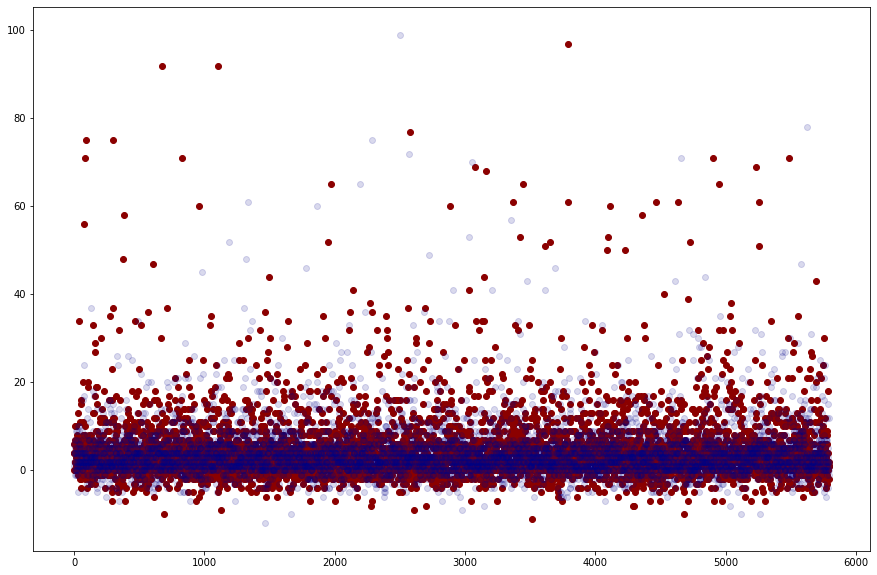

In [545]:
plt.figure(figsize=(15,10))
plt.scatter(range(len(y_pred)),y_pred , c = 'darkred')
plt.scatter( range(len(y_test)),y_test, c='darkblue',alpha=.15)
plt.show()

##### RidgeCV

In [181]:
regression(ridge)

RMSE = 8.8475
Test set RMSE: 8.84752
CV RMSE: 9.12615
r2 Score: 0.14756
Train RMSE: 9.10737
Boosting Accuracy: 0.148


##### SVM

In [182]:
regression(svr)

RMSE = 9.4015
Test set RMSE: 9.40155
CV RMSE: 9.66401
r2 Score: 0.03745
Train RMSE: 9.65746
Boosting Accuracy: 0.105


In [183]:
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
svr_resid = y_pred_svr - y_test
metrics.median_absolute_error(y_test, y_pred_svr)

2.8101360861140012

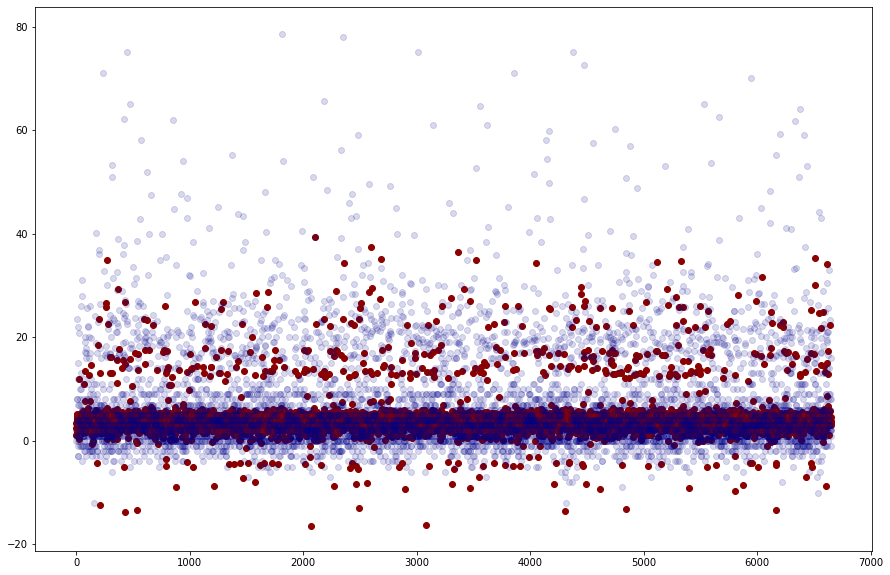

In [184]:
plt.figure(figsize=(15,10))
plt.scatter(range(len(y_pred_svr)),y_pred_svr , c = 'darkred')
plt.scatter( range(len(y_test)),y_test, c='darkblue',alpha=.15)
plt.show()

#### XGBoost

In [185]:
import xgboost as xgb

In [186]:
feature_names = smoted_df.columns.drop("Yards").tolist()

In [187]:
len(feature_names)

48

In [ ]:
dtrain = xgb.DMatrix(x_train, feature_names= feature_names , label=y_train)
dtest = xgb.DMatrix(x_test, feature_names= feature_names, label=y_test)
param_dict = {
    'max_depth':6, 
    'min_child_weight': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'mae'
}
num_boost_round=500
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],early_stopping_rounds=10
)

[19:35:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#eval_set = [(X_train, y_train), (X_test, y_test)]
#eval_metric = ["auc","error"]
#%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [ ]:
predictions = model.predict(dtest)

acc_xgb=model.best_score
print("RMSE of XGB model on testing data: ",
      np.sqrt(MSE(predictions, y_test)))
print("Model's best RMSE on train set: ", model.best_score)
print('Boosting Accuracy: {:.3f}'.format(explained_variance_score(y_test,predictions )))    
print("Model's best iteration: ", model.best_iteration+1)
print("Models's r2 score: ", r2_score(y_test,predictions))

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
# plot feature importance
plt.rcParams["figure.figsize"] = (20, 30)
plot_importance(model, height= .8)

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(range(len(predictions)),predictions , c = 'red')
plt.scatter( range(len(y_test)),y_test, c='blue',alpha=.15)
plt.show()

In [ ]:
import time

start_time = time.time()

#DO WORK HERE

end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)